In [121]:
from PIL import Image
import os   
import json

In [122]:
import cv2
import numpy as np
from sklearn.neighbors import NearestNeighbors

In [28]:
def list_files(dir):
    list_of_images = []
    for subdir, dirs, files in os.walk(dir):
        for file in files:
            if file == '.DS_Store':
                continue
            else:
                list_of_images.append(str(os.path.join(subdir, file)))
    return list_of_images

In [ ]:
def resize_img_save_it(list_of_paths):
    for img in list_of_paths:
        try:
            im1 = Image.open(img)
            width = 228
            height = 228
            im5 = im1.resize((width, height), Image.ANTIALIAS)    # best down-sizing filter
            im5.save(img)
        except:
            print(img)
            continue
            
    

In [29]:
def get_numpy_array():
    X_train = []
    path = '/Users/nikeshmangwani/Desktop/Autoencoder/questions/images'
    list_of_paths = list_files(path)
    for img in list_of_paths:
        image = cv2.imread(img)
        X_train.append(image)
        
    return (np.array(X_train),list_of_paths)

In [30]:
X_train,list_of_paths = get_numpy_array()

In [31]:
X_train.shape

(4070, 228, 228, 3)

In [32]:
X_train = X_train.astype('float32') / 255.

In [33]:
X_train.shape

(4070, 228, 228, 3)

In [34]:
list_of_images_names = []

In [35]:
for string in list_of_paths:
    lis = string.split('/')
    length = len(lis)
    image_name = lis[length-1]
    list_of_images_names.append(image_name)

In [36]:
import numpy as np
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [37]:
from keras.models import load_model
encoder = load_model('chemistry_encoder.h5')

Instructions for updating:
Colocations handled automatically by placer.


/anaconda3/lib/python3.7/site-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [78]:
query = X_train[300]


In [79]:
query

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       ...,

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]], dtype=float32)

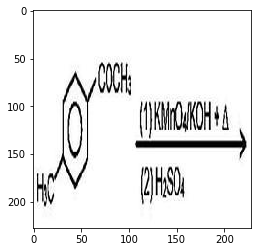

In [80]:
plt.imshow(query)


In [77]:
query_code = encoder.predict(query.reshape(1,228, 228, 3))

In [58]:
query_code.shape


(1, 29, 29, 8)

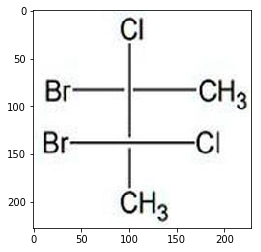

In [83]:
query_1 = X_train[310]
plt.imshow(query_1)
query_code_1 = encoder.predict(query_1.reshape(1,228, 228, 3))


In [86]:
query_code_1 = query_code_1.reshape(1, 29*29*8)

In [87]:
query_code = query_code.reshape(1, 29*29*8)

In [94]:
from scipy import spatial
import numpy
#from sklearn.metrics.pairwise import euclidean_distances
import sklearn

In [103]:
eudistance = spatial.distance.euclidean(query_code, query_code_1)


In [104]:
eudistance

54.041255950927734

In [124]:
sklearn.metrics.pairwise_distances(norm1,norm2,metric="euclidean")

array([[0.5138242]], dtype=float32)

## Normalized Numpy Arrays

In [113]:
norm1 = query_code / np.linalg.norm(query_code)

In [130]:
norm1

array([[ 0.00487251,  0.00669953,  0.00518272, ...,  0.00961935,
         0.01578688, -0.        ]], dtype=float32)

In [116]:
norm2 = query_code_1 / np.linalg.norm(query_code_1)

In [125]:
euc = sklearn.metrics.pairwise_distances(norm1,norm2,metric="euclidean")

In [127]:
euc[0][0]

0.5138242

In [13]:
lower_dimension_codes = encoder.predict(X_train)

In [14]:
codes_1 = lower_dimension_codes.reshape(-1, 29*29*8)


In [15]:
nbrs_euc = NearestNeighbors(n_neighbors=n_neigh,metric='euclidean').fit(codes_1)

In [18]:
import time

In [19]:
for idx in np.ndindex(lower_dimension_codes.shape[:1:]):
    start_time = time.time()
    query = lower_dimension_codes[idx]
    #X_train_1 = np.delete(lower_dimension_codes, idx, axis=0)
    higher_dimension_codes_query = X_train[idx]
    #codes_1 = X_train_1.reshape(-1, 29*29*8)
    query_code_1 = query.reshape(1, 29*29*8)
    #nbrs = NearestNeighbors(n_neighbors=n_neigh).fit(codes_1)
    
    
    distances, indices = nbrs_euc.kneighbors(np.array(query_code_1))
    
    list_indices = indices[0].tolist()
    distance_indices = distances[0].tolist()
    
    closest_images = X_train[indices]
    closest_images = closest_images.reshape(-1,228,228,3)
    dir_name = "Euclidean/set" + str(idx[0]+1)
    os.mkdir(dir_name)
    
    plt.imsave(dir_name+"/"+list_of_images_names[idx[0]], higher_dimension_codes_query)
    meta_data_list = []
    for i in range(n_neigh):
        index = list_indices[i]
        closest_image_name = list_of_images_names[index]
        plt.imsave(dir_name+"/"+closest_image_name, closest_images[i])
        meta_data_list.append((list_of_images_names[idx[0]],closest_image_name,distance_indices[i]))
        
    with open(dir_name +"/"+'meta_data.json', 'w') as f:
        json.dump({"response":{"query_image":list_of_images_names[idx[0]],"results":meta_data_list}}, f)
    end_time = time.time()
    print(end_time - start_time)

0.5043549537658691
0.13746905326843262
0.14524507522583008
0.12698817253112793
0.14848685264587402
0.1256568431854248
0.13870620727539062
0.12035822868347168
0.17789697647094727
0.17911601066589355
0.14481210708618164
0.142866849899292
0.1304469108581543
0.11643385887145996
0.14586496353149414
0.14827704429626465
0.18360304832458496
0.1799159049987793
0.21576976776123047
0.1676478385925293
0.17735505104064941
0.13768506050109863
0.14266586303710938
0.15445995330810547
0.19067978858947754
0.16140222549438477
0.19994688034057617
0.19933676719665527
0.1443800926208496
0.11230993270874023
0.13997411727905273
0.11929512023925781
0.11581301689147949
0.15936803817749023
0.12955880165100098
0.15268826484680176
0.19043493270874023
0.18306469917297363
0.17016911506652832
0.12291789054870605
0.14056611061096191
0.19765686988830566
0.1547541618347168
0.12460613250732422
0.12250494956970215
0.18234801292419434
0.17115497589111328
0.18163394927978516
0.15473055839538574
0.1466200351715088
0.12765002

0.2410597801208496
0.26831889152526855
0.21119165420532227
0.17238116264343262
0.234483003616333
0.1765749454498291
0.15752196311950684
0.12816405296325684
0.14513587951660156
0.23488116264343262
0.1337583065032959
0.14367413520812988
0.14690494537353516
0.18042492866516113
0.10961604118347168
0.12176680564880371
0.11723804473876953
0.1283879280090332
0.10602617263793945
0.11035490036010742
0.11809396743774414
0.19272398948669434
0.16936612129211426
0.16797709465026855
0.16122698783874512
0.15647006034851074
0.11902689933776855
0.171921968460083
0.1333911418914795
0.12471580505371094
0.1598358154296875
0.15407490730285645
0.12462210655212402
0.137542724609375
0.12974214553833008
0.16341185569763184
0.16445016860961914
0.1589491367340088
0.17406177520751953
0.11201119422912598
0.1336228847503662
0.1498880386352539
0.17465496063232422
0.15257596969604492
0.11712980270385742
0.11020684242248535
0.11389422416687012
0.13280725479125977
0.1248629093170166
0.15064072608947754
0.16194891929626

0.14215898513793945
0.15555191040039062
0.1593468189239502
0.13503003120422363
0.14992213249206543
0.16848421096801758
0.16310405731201172
0.12327003479003906
0.1338038444519043
0.2027580738067627
0.14339709281921387
0.11686897277832031
0.12157678604125977
0.14695024490356445
0.12676596641540527
0.14903998374938965
0.1253361701965332
0.11400604248046875
0.11355185508728027
0.12393712997436523
0.1434156894683838
0.1495528221130371
0.13974380493164062
0.12170219421386719
0.1301281452178955
0.12788605690002441
0.13225007057189941
0.14452290534973145
0.12856197357177734
0.11707782745361328
0.12479591369628906
0.12150406837463379
0.11172103881835938
0.15088701248168945
0.1312410831451416
0.13453912734985352
0.13817691802978516
0.11022090911865234
0.11360597610473633
0.15761613845825195
0.13591289520263672
0.1144859790802002
0.11987829208374023
0.14746689796447754
0.124603271484375
0.13436484336853027
0.12165188789367676
0.11834073066711426
0.13644075393676758
0.11332201957702637
0.145241975

0.12532305717468262
0.11924004554748535
0.12879204750061035
0.13834285736083984
0.12742400169372559
0.11315202713012695
0.12453985214233398
0.12404918670654297
0.1346149444580078
0.1312119960784912
0.11930108070373535
0.11452102661132812
0.11755609512329102
0.10662984848022461
0.11305809020996094
0.15218615531921387
0.1322770118713379
0.1423354148864746
0.12128114700317383
0.11009716987609863
0.12313604354858398
0.16691207885742188
0.18034911155700684
0.2036428451538086
0.14854884147644043
0.17568087577819824
0.14989781379699707
0.1486358642578125
0.15166282653808594
0.13984298706054688
0.14041590690612793
0.1860980987548828
0.15777897834777832
0.16203618049621582
0.17137718200683594
0.1966700553894043
0.18880510330200195
0.17323994636535645
0.17326092720031738
0.1425778865814209
0.12621092796325684
0.12120199203491211
0.15126919746398926
0.18040132522583008
0.13117098808288574
0.13461875915527344
0.10927486419677734
0.11887407302856445
0.1182100772857666
0.11756014823913574
0.14932394

0.11440610885620117
0.1092221736907959
0.11266088485717773
0.10755085945129395
0.10535120964050293
0.10830402374267578
0.12745285034179688
0.12733888626098633
0.11388397216796875
0.10853791236877441
0.1110529899597168
0.11051416397094727
0.1132209300994873
0.11239218711853027
0.10979413986206055
0.10448884963989258
0.1260838508605957
0.10599493980407715
0.10465002059936523
0.1115257740020752
0.11378097534179688
0.10439705848693848
0.10967016220092773
0.11220812797546387
0.1104886531829834
0.12422299385070801
0.1155400276184082
0.10332918167114258
0.11286807060241699
0.11947226524353027
0.11865115165710449
0.11551690101623535
0.11675524711608887
0.11124706268310547
0.12317800521850586
0.10608983039855957
0.10802197456359863
0.11858272552490234
0.1348271369934082
0.1070108413696289
0.13088512420654297
0.10529088973999023
0.10891389846801758
0.11825275421142578
0.12049007415771484
0.11416101455688477
0.12877202033996582
0.10549783706665039
0.10700297355651855
0.11281180381774902
0.1081449

0.10680603981018066
0.11458206176757812
0.11509203910827637
0.11141180992126465
0.12375402450561523
0.12247014045715332
0.12779903411865234
0.10529923439025879
0.12023472785949707
0.11380600929260254
0.11335396766662598
0.10840606689453125
0.11399602890014648
0.13261914253234863
0.11474418640136719
0.11196494102478027
0.12094593048095703
0.12213921546936035
0.11712884902954102
0.11067605018615723
0.11367201805114746
0.11784029006958008
0.11603999137878418
0.10140395164489746
0.11847281455993652
0.1125328540802002
0.10902595520019531
0.10766792297363281
0.10678410530090332
0.10473322868347168
0.11560201644897461
0.1257340908050537
0.10967803001403809
0.12915897369384766
0.10914468765258789
0.11642289161682129
0.11041092872619629
0.10899996757507324
0.11687707901000977
0.1163630485534668
0.12780022621154785
0.10376095771789551
0.11071205139160156
0.12050890922546387
0.12646079063415527
0.11015796661376953
0.10760688781738281
0.11525702476501465
0.11306214332580566
0.11242198944091797
0.1

0.10953617095947266
0.12158608436584473
0.12017107009887695
0.11332511901855469
0.12976503372192383
0.10213589668273926
0.11130523681640625
0.10499715805053711
0.1272437572479248
0.06372928619384766
0.11067080497741699
0.10947203636169434
0.11161303520202637
0.11275386810302734
0.10648226737976074
0.10823297500610352
0.10480403900146484
0.12075686454772949
0.10879397392272949
0.10586285591125488
0.12503290176391602
0.12727999687194824
0.1129457950592041
0.11937570571899414
0.1179049015045166
0.11444401741027832
0.11406111717224121
0.12872791290283203
0.11546802520751953
0.12587475776672363
0.12078404426574707
0.11790800094604492
0.10688591003417969
0.1247103214263916
0.1071939468383789
0.10974311828613281
0.11393475532531738
0.11243605613708496
0.12106704711914062
0.11418271064758301
0.11398506164550781
0.11153221130371094
0.11057615280151367
0.1062479019165039
0.1145467758178711
0.11657905578613281
0.1078329086303711
0.11149430274963379
0.1272110939025879
0.12392807006835938
0.1065890

0.10827517509460449
0.11368489265441895
0.12503600120544434
0.11113810539245605
0.11324000358581543
0.1162407398223877
0.5095968246459961
0.11058592796325684
0.11708903312683105
0.11106467247009277
0.11571407318115234
0.10331296920776367
0.107025146484375
0.1152029037475586
0.10657525062561035
0.10646915435791016
0.11365890502929688
0.11151885986328125
0.10909295082092285
0.11227011680603027
0.10997819900512695
0.11399412155151367
0.11357712745666504
0.11700606346130371
0.11531233787536621
0.12004303932189941
0.12173223495483398
0.1100318431854248
0.12291288375854492
0.10758399963378906
0.1181650161743164
0.11149287223815918
0.11526989936828613
0.11200404167175293
0.10447192192077637
0.11049199104309082
0.1030740737915039
0.10549497604370117
0.1024010181427002
0.10742926597595215
0.11518287658691406
0.10610485076904297
0.10458683967590332
0.10815882682800293
0.11176896095275879
0.10766386985778809
0.10315990447998047
0.11091804504394531
0.12103605270385742
0.1172337532043457
0.11034011

0.13318610191345215
0.11387395858764648
0.11447286605834961
0.13299083709716797
0.1124579906463623
0.11258697509765625
0.11870408058166504
0.11213326454162598
0.11179280281066895
0.11582183837890625
0.11448287963867188
0.10819482803344727
0.11646008491516113
0.11135172843933105
0.1217031478881836
0.1317439079284668
0.11142182350158691
0.11964869499206543
0.11443591117858887
0.11444211006164551
0.1131129264831543
0.12938404083251953
0.12265491485595703
0.1200709342956543
0.11311101913452148
0.11332297325134277
0.12127494812011719
0.11422324180603027
0.12030506134033203
0.1144099235534668
0.1172800064086914
0.11635303497314453
0.1159830093383789
0.11881184577941895
0.1258087158203125
0.12851715087890625
0.1453239917755127
0.14196205139160156
0.1253209114074707
0.13192296028137207
0.14246916770935059
0.14632797241210938
0.14752411842346191
0.11537313461303711
0.1182401180267334
0.12294912338256836
0.13248586654663086
0.12653112411499023
0.12668991088867188
0.11923527717590332
0.1223359107

0.12624812126159668
0.11315798759460449
0.11772584915161133
0.11956095695495605
0.1134181022644043
0.11513876914978027
0.11649203300476074
0.10839319229125977
0.11575508117675781
0.15192103385925293
0.13042402267456055
0.13970589637756348
0.1479189395904541
0.1438579559326172
0.14856481552124023
0.1588449478149414
0.15509700775146484
0.16856002807617188
0.16466116905212402
0.2159130573272705
0.15195512771606445
0.11832404136657715
0.11027383804321289
0.13435077667236328
0.1212160587310791
0.1336979866027832
0.14020895957946777
0.1874680519104004
0.19967412948608398
0.21273064613342285
0.1368880271911621
0.13519573211669922
0.1468801498413086
0.14473295211791992
0.18642687797546387
0.19615793228149414
0.11824893951416016
0.12037992477416992
0.11363911628723145
0.11594319343566895
0.13381719589233398
0.15394806861877441
0.18361806869506836
0.13102102279663086
0.12046003341674805
0.11989498138427734
0.1193690299987793
0.1330862045288086
0.14678072929382324
0.1636638641357422
0.15940999984

In [20]:
import json

with open('my_dict.json', 'w') as f:
    json.dump({"response":{"query_image":list_of_images_names[idx[0]],"results":meta_data_list}}, f)

In [21]:
import json
meta_list = [("2.png",24),("3.png",23)]
with open('my_dict.json', 'w') as f:
    json.dump({"response":{"query_image":"1.png","results":meta_list}}, f)

In [21]:
import json
meta_list = [("2.png",24),("3.png",23)]
with open('my_dict.json') as f:
    
    

SyntaxError: unexpected EOF while parsing (<ipython-input-21-01d1cb5d5b02>, line 5)

In [ ]:
print(json.dumps(("apple", "bananas")))

In [22]:
nbrs_euc = NearestNeighbors(n_neighbors=n_neigh,metric='manhattan').fit(codes_1)

In [23]:
for idx in np.ndindex(lower_dimension_codes.shape[:1:]):
    start_time = time.time()
    query = lower_dimension_codes[idx]
    #X_train_1 = np.delete(lower_dimension_codes, idx, axis=0)
    higher_dimension_codes_query = X_train[idx]
    #codes_1 = X_train_1.reshape(-1, 29*29*8)
    query_code_1 = query.reshape(1, 29*29*8)
    #nbrs = NearestNeighbors(n_neighbors=n_neigh).fit(codes_1)
    
    
    distances, indices = nbrs_euc.kneighbors(np.array(query_code_1))
    
    list_indices = indices[0].tolist()
    distance_indices = distances[0].tolist()
    
    closest_images = X_train[indices]
    closest_images = closest_images.reshape(-1,228,228,3)
    dir_name = "Manhattan/set" + str(idx[0]+1)
    os.mkdir(dir_name)
    
    plt.imsave(dir_name+"/"+list_of_images_names[idx[0]], higher_dimension_codes_query)
    meta_data_list = []
    for i in range(n_neigh):
        index = list_indices[i]
        closest_image_name = list_of_images_names[index]
        plt.imsave(dir_name+"/"+closest_image_name, closest_images[i])
        meta_data_list.append((list_of_images_names[idx[0]],closest_image_name,distance_indices[i]))
        
    with open(dir_name +"/"+'meta_data.json', 'w') as f:
        json.dump({"response":{"query_image":list_of_images_names[idx[0]],"results":meta_data_list}}, f)
    end_time = time.time()
    print(end_time - start_time)

0.12343811988830566
0.1064462661743164
0.1080467700958252
0.10625910758972168
0.10968399047851562
0.10581302642822266
0.10626411437988281
0.10307788848876953
0.10400915145874023
0.10924577713012695
0.11113595962524414
0.10831475257873535
0.10851931571960449
0.10344696044921875
0.10779905319213867
0.10692787170410156
0.10327291488647461
0.10025405883789062
0.10515689849853516
0.1027519702911377
0.10758829116821289
0.10671377182006836
0.09961915016174316
0.10351085662841797
0.10475587844848633
0.10032296180725098
0.09643697738647461
0.10360217094421387
0.1003410816192627
0.10987687110900879
0.11537814140319824
0.10387396812438965
0.10771012306213379
0.10361003875732422
0.10197591781616211
0.10440397262573242
0.11501717567443848
0.10666489601135254
0.11779522895812988
0.10634112358093262
0.10328412055969238
0.1628861427307129
0.11643004417419434
0.11174130439758301
0.1107339859008789
0.11302876472473145
0.1154031753540039
0.11697888374328613
0.10983920097351074
0.1085059642791748
0.120928

0.12006187438964844
0.11443305015563965
0.12406182289123535
0.10971784591674805
0.11512994766235352
0.12163472175598145
0.11154675483703613
0.1104581356048584
0.10340404510498047
0.10218501091003418
0.1060018539428711
0.10766887664794922
0.12947797775268555
0.11862802505493164
0.1082921028137207
0.10716080665588379
0.10838603973388672
0.10032892227172852
0.11220908164978027
0.12114405632019043
0.11945486068725586
0.11560487747192383
0.11839103698730469
0.11529278755187988
0.11650896072387695
0.11089611053466797
0.11256909370422363
0.11653661727905273
0.128525972366333
0.12181210517883301
0.12547516822814941
0.11231374740600586
0.11991310119628906
0.10208511352539062
0.11341691017150879
0.10832786560058594
0.10342288017272949
0.10244297981262207
0.10201811790466309
0.1007680892944336
0.10895085334777832
0.10559201240539551
0.10444474220275879
0.10862183570861816
0.10007405281066895
0.10019135475158691
0.11620402336120605
0.10290718078613281
0.10624098777770996
0.10617208480834961
0.1054

0.10344433784484863
0.11022591590881348
0.10267496109008789
0.10515213012695312
0.10155510902404785
0.10623788833618164
0.10541391372680664
0.09906983375549316
0.1059410572052002
0.11261224746704102
0.1060941219329834
0.09689807891845703
0.10303211212158203
0.10398697853088379
0.10383892059326172
0.1165308952331543
0.10647201538085938
0.10705900192260742
0.10099577903747559
0.09937524795532227
0.11383199691772461
0.10891222953796387
0.1018671989440918
0.10057902336120605
0.10989904403686523
0.10769891738891602
0.1055150032043457
0.10379791259765625
0.12016797065734863
0.10266804695129395
0.10868692398071289
0.10415005683898926
0.09867000579833984
0.10339093208312988
0.0992128849029541
0.09839725494384766
0.10325217247009277
0.10164403915405273
0.09997105598449707
0.1022031307220459
0.10531401634216309
0.09901309013366699
0.11239290237426758
0.0997622013092041
0.1015160083770752
0.1069948673248291
0.1119232177734375
0.11198806762695312
0.10409903526306152
0.10250210762023926
0.122231721

0.11269903182983398
0.10921573638916016
0.10760998725891113
0.10322308540344238
0.0993950366973877
0.10212874412536621
0.10157299041748047
0.10102081298828125
0.1021571159362793
0.10318303108215332
0.10561323165893555
0.10029792785644531
0.10198783874511719
0.09940218925476074
0.09928417205810547
0.10496091842651367
0.10309505462646484
0.10587906837463379
0.10229086875915527
0.1027841567993164
0.09873199462890625
0.10405206680297852
0.10123801231384277
0.0996549129486084
0.1042943000793457
0.10085916519165039
0.10317611694335938
0.10297274589538574
0.0998530387878418
0.10099387168884277
0.10456180572509766
0.10288000106811523
0.10009598731994629
0.10600924491882324
0.1011199951171875
0.10534095764160156
0.11091804504394531
0.1036381721496582
0.10108399391174316
0.107421875
0.10438680648803711
0.1024320125579834
0.10893702507019043
0.10665202140808105
0.09859704971313477
0.10066008567810059
0.10311698913574219
0.09748482704162598
0.10172700881958008
0.10948419570922852
0.100887060165405

0.10914397239685059
0.10926675796508789
0.10768294334411621
0.1032860279083252
0.1183328628540039
0.10936403274536133
0.1263110637664795
0.12472295761108398
0.10918807983398438
0.11136794090270996
0.11666297912597656
0.10976386070251465
0.11377263069152832
0.10753607749938965
0.10880398750305176
0.1087949275970459
0.10976409912109375
0.10651874542236328
0.10471510887145996
0.10567498207092285
0.10529303550720215
0.1062779426574707
0.1061861515045166
0.11375284194946289
0.11218094825744629
0.11471915245056152
0.10321593284606934
0.10626220703125
0.11101984977722168
0.10584592819213867
0.10737991333007812
0.1117868423461914
0.10847282409667969
0.10158419609069824
0.1142280101776123
0.10974287986755371
0.10516500473022461
0.10831689834594727
0.11712312698364258
0.10679030418395996
0.1046910285949707
0.11428475379943848
0.10384726524353027
0.11513113975524902
0.1067659854888916
0.1049950122833252
0.11107802391052246
0.1049950122833252
0.10259103775024414
0.11697220802307129
0.1051170825958

0.12116503715515137
0.12735605239868164
0.19374895095825195
0.12519407272338867
0.12528014183044434
0.12537407875061035
0.10806107521057129
0.11362910270690918
0.12621498107910156
0.11659598350524902
0.13451027870178223
0.11986994743347168
0.12119126319885254
0.12080907821655273
0.11765193939208984
0.13463401794433594
0.10952401161193848
0.11465287208557129
0.12141990661621094
0.1220390796661377
0.11524820327758789
0.12189316749572754
0.13168096542358398
0.12678098678588867
0.12133193016052246
0.11181807518005371
0.10199809074401855
0.10201811790466309
0.11008000373840332
0.11146688461303711
0.10092902183532715
0.10473895072937012
0.10365986824035645
0.10086321830749512
0.10786890983581543
0.10397100448608398
0.10118818283081055
0.10537290573120117
0.1017460823059082
0.1029963493347168
0.10072493553161621
0.11023688316345215
0.1020967960357666
0.10343790054321289
0.10892009735107422
0.1038978099822998
0.10297179222106934
0.10193777084350586
0.10056281089782715
0.10321688652038574
0.099

0.11645102500915527
0.124603271484375
0.11895513534545898
0.12463021278381348
0.11514067649841309
0.11400198936462402
0.11627697944641113
0.13121509552001953
0.11982083320617676
0.12260890007019043
0.12155508995056152
0.1218259334564209
0.1238248348236084
0.08759522438049316
0.12729287147521973
0.12291193008422852
0.12380313873291016
0.11805415153503418
0.11661982536315918
0.11825776100158691
0.11287093162536621
0.11806511878967285
0.12297606468200684
0.11599993705749512
0.12676692008972168
0.1326427459716797
0.1182551383972168
0.10065984725952148
0.10912728309631348
0.10301804542541504
0.12002992630004883
0.13734221458435059
0.12272119522094727
0.12685203552246094
0.13915014266967773
0.11052703857421875
0.12080097198486328
0.12382984161376953
0.12460923194885254
0.13567900657653809
0.1311190128326416
0.12711095809936523
0.11636686325073242
0.1123960018157959
0.0998847484588623
0.0976400375366211
0.10694098472595215
0.11882400512695312
0.11826109886169434
0.12334799766540527
0.11677718

0.10440802574157715
0.10066008567810059
0.10260486602783203
0.10253787040710449
0.19103193283081055
0.13151884078979492
0.10846185684204102
0.10471820831298828
0.10076284408569336
0.1039588451385498
0.10126686096191406
0.100250244140625
0.10926318168640137
0.10866785049438477
0.1025233268737793
0.1015167236328125
0.09863710403442383
0.10202693939208984
0.10216999053955078
0.10124707221984863
0.09909200668334961
0.1050560474395752
0.10148501396179199
0.09750080108642578
0.10358595848083496
0.09736227989196777
0.09734821319580078
0.10187292098999023
0.10160279273986816
0.10336685180664062
0.10674524307250977
0.10981917381286621
0.11972880363464355
0.1182241439819336
0.13924193382263184
0.15044927597045898
0.1394810676574707
0.11444807052612305
0.12160491943359375
0.10905098915100098
0.13271284103393555
0.1415729522705078
0.1304030418395996
0.20845627784729004
0.14589905738830566
0.18586397171020508
0.19626712799072266
0.16160893440246582
0.19692087173461914
0.1491708755493164
0.138483047

0.10572695732116699
0.11154007911682129
0.12187886238098145
0.11460614204406738
0.1259920597076416
0.11558723449707031
0.1262369155883789
0.10869097709655762
0.14919590950012207
0.10727787017822266
0.14927196502685547
0.1264331340789795
0.13557195663452148
0.12067008018493652
0.12852001190185547
0.11123514175415039
0.12033319473266602
0.1191408634185791
0.11823391914367676
0.12642574310302734
0.17385125160217285
0.13139915466308594
0.12222123146057129
0.12724614143371582
0.34222912788391113
0.157944917678833
0.16909503936767578
0.13909411430358887
0.12337088584899902
0.12424898147583008
0.14307403564453125
0.13261795043945312
0.11878609657287598
0.10697412490844727
0.11859989166259766
0.11579108238220215
0.11778998374938965
0.15407681465148926
0.12756085395812988
0.10666608810424805
0.11577439308166504
0.14201593399047852
0.1311659812927246
0.11453700065612793
0.10466599464416504
0.10754823684692383
0.11790800094604492
0.11255288124084473
0.1080329418182373
0.10793089866638184
0.107125

0.10662579536437988
0.1285398006439209
0.10117387771606445
0.09510087966918945
0.10144209861755371
0.10533618927001953
0.1055750846862793
0.1045827865600586
0.10478997230529785
0.09985089302062988
0.10153388977050781
0.10476088523864746
0.09823274612426758
0.10233879089355469
0.1049509048461914
0.10263395309448242
0.10858535766601562
0.10157108306884766
0.10962820053100586
0.10376787185668945
0.1170961856842041
0.11787104606628418
0.10481405258178711
0.09996414184570312
0.10741400718688965
0.10955977439880371
0.10058808326721191
0.10904717445373535
0.10032272338867188
0.10308003425598145
0.10352683067321777
0.11202311515808105
0.10628581047058105
0.10310816764831543
0.1094820499420166
0.10518932342529297
0.09775376319885254
0.11968612670898438
0.1091759204864502
0.09920310974121094
0.11711692810058594
0.09975004196166992
0.1046609878540039
0.11209607124328613
0.10600996017456055
0.1038520336151123
0.11481690406799316
0.10076308250427246
0.10524106025695801
0.10714197158813477
0.1015760

In [24]:
nbrs_euc = NearestNeighbors(n_neighbors=n_neigh,metric='cosine').fit(codes_1)

In [25]:
for idx in np.ndindex(lower_dimension_codes.shape[:1:]):
    start_time = time.time()
    query = lower_dimension_codes[idx]
    #X_train_1 = np.delete(lower_dimension_codes, idx, axis=0)
    higher_dimension_codes_query = X_train[idx]
    #codes_1 = X_train_1.reshape(-1, 29*29*8)
    query_code_1 = query.reshape(1, 29*29*8)
    #nbrs = NearestNeighbors(n_neighbors=n_neigh).fit(codes_1)
    
    
    distances, indices = nbrs_euc.kneighbors(np.array(query_code_1))
    
    list_indices = indices[0].tolist()
    distance_indices = distances[0].tolist()
    
    closest_images = X_train[indices]
    closest_images = closest_images.reshape(-1,228,228,3)
    dir_name = "Cosine/set" + str(idx[0]+1)
    os.mkdir(dir_name)
    
    plt.imsave(dir_name+"/"+list_of_images_names[idx[0]], higher_dimension_codes_query)
    meta_data_list = []
    for i in range(n_neigh):
        index = list_indices[i]
        closest_image_name = list_of_images_names[index]
        plt.imsave(dir_name+"/"+closest_image_name, closest_images[i])
        meta_data_list.append((list_of_images_names[idx[0]],closest_image_name,distance_indices[i]))
        
    with open(dir_name +"/"+'meta_data.json', 'w') as f:
        json.dump({"response":{"query_image":list_of_images_names[idx[0]],"results":meta_data_list}}, f)
    end_time = time.time()
    print(end_time - start_time)

0.25276994705200195
0.24037504196166992
0.17993402481079102
0.2390918731689453
0.2610139846801758
0.2524747848510742
0.2702789306640625
0.25591588020324707
0.23929405212402344
0.2548542022705078
0.2565310001373291
0.24263715744018555
0.25286293029785156
0.25432300567626953
0.24536871910095215
0.25940799713134766
0.2484889030456543
0.25046873092651367
0.2271111011505127
0.22964191436767578
0.250917911529541
0.24849677085876465
0.2341601848602295
0.250654935836792
0.2906632423400879
0.28096699714660645
0.24459218978881836
0.48000288009643555
0.40479207038879395
0.4038248062133789
0.3023550510406494
0.24349522590637207
0.23869609832763672
0.27820706367492676
0.258228063583374
0.22488093376159668
0.24657487869262695
0.2511279582977295
0.24606895446777344
0.26709628105163574
0.35136985778808594
0.23952102661132812
0.2647888660430908
0.24257683753967285
0.24244403839111328
0.3115241527557373
0.25762200355529785
0.29717516899108887
0.3257322311401367
0.33318614959716797
0.5933692455291748
0.3

0.2435929775238037
0.21926188468933105
0.2238788604736328
0.22801995277404785
0.22115087509155273
0.23474907875061035
0.22768282890319824
0.2218160629272461
0.2371668815612793
0.21744108200073242
0.22214412689208984
0.22116875648498535
0.2306361198425293
0.22527503967285156
0.22242999076843262
0.2212972640991211
0.2249448299407959
0.22618818283081055
0.22807693481445312
0.2162456512451172
0.22559523582458496
0.2248997688293457
0.21780014038085938
0.22250819206237793
0.2241661548614502
0.21704792976379395
0.22829890251159668
0.22694706916809082
0.21765589714050293
0.22221589088439941
0.22119927406311035
0.2203969955444336
0.22304797172546387
0.22014498710632324
0.22421622276306152
0.22160983085632324
0.22464489936828613
0.21972894668579102
0.2236931324005127
0.22500109672546387
0.22333693504333496
0.22453594207763672
0.21631503105163574
0.22340869903564453
0.218858003616333
0.2214510440826416
0.2200620174407959
0.22927594184875488
0.22771000862121582
0.22375798225402832
0.22199106216430

0.2365410327911377
0.21967387199401855
0.18143200874328613
0.23067688941955566
0.21824312210083008
0.19197893142700195
0.29246068000793457
0.24883294105529785
0.2736387252807617
0.37494826316833496
0.2393033504486084
0.20539593696594238
0.24254631996154785
0.22717905044555664
0.19819188117980957
0.2686917781829834
0.278226375579834
0.20819592475891113
0.300386905670166
0.28934383392333984
0.1873767375946045
0.2868959903717041
0.22989487648010254
0.19415593147277832
0.2723259925842285
0.2690129280090332
0.20844578742980957
0.2325148582458496
0.2545039653778076
0.20230889320373535
0.25072383880615234
0.2506699562072754
0.18237590789794922
0.275892972946167
0.23672986030578613
0.22191691398620605
0.23727202415466309
0.22921013832092285
0.2038421630859375
0.24799418449401855
0.2239522933959961
0.17929291725158691
0.24265694618225098
0.2330780029296875
0.21704792976379395
0.23222088813781738
0.22276902198791504
0.20420193672180176
0.22933077812194824
0.22863507270812988
0.20955777168273926


0.22823023796081543
0.2186601161956787
0.19262003898620605
0.22375202178955078
0.22315287590026855
0.17778301239013672
0.21792101860046387
0.21074390411376953
0.17611002922058105
0.22691726684570312
0.2182300090789795
0.17854094505310059
0.21979403495788574
0.21893620491027832
0.17312884330749512
0.22001099586486816
0.2120668888092041
0.17797613143920898
0.2151961326599121
0.16477704048156738
0.16730499267578125
0.1745457649230957
0.2129061222076416
0.17907977104187012
0.218505859375
0.21296310424804688
0.1742572784423828
0.2225360870361328
0.21279382705688477
0.17734909057617188
0.23149585723876953
0.2170698642730713
0.17622089385986328
0.21785497665405273
0.22335505485534668
0.22178411483764648
0.2259228229522705
0.21011710166931152
0.17309212684631348
0.2083590030670166
0.16823983192443848
0.17627477645874023
0.22264790534973145
0.22851800918579102
0.1875321865081787
0.23746109008789062
0.22658109664916992
0.186049222946167
0.23638415336608887
0.2323300838470459
0.19183897972106934


0.4477391242980957
0.29215502738952637
0.31078195571899414
0.2779867649078369
0.23305821418762207
0.23610234260559082
0.2509322166442871
0.20046615600585938
0.2516932487487793
0.2324662208557129
0.19562220573425293
0.2590970993041992
0.35758423805236816
0.25481104850769043
0.2587919235229492
0.24868559837341309
0.20834684371948242
0.29033374786376953
0.23482227325439453
0.19903826713562012
0.2969081401824951
0.25014591217041016
0.2700018882751465
0.3115677833557129
0.2870619297027588
0.2534830570220947
0.25924015045166016
0.2416670322418213
0.19971680641174316
0.29259705543518066
0.28867506980895996
0.20053386688232422
0.26789093017578125
0.39512109756469727
0.34198594093322754
0.2918131351470947
0.3653550148010254
0.20894479751586914
0.42763376235961914
0.3157460689544678
0.2772819995880127
0.32782983779907227
0.26053476333618164
0.43581390380859375
0.29538607597351074
0.33972811698913574
0.3428051471710205
0.4748997688293457
0.4427671432495117
0.3194270133972168
0.42963600158691406
0

0.3097548484802246
0.3263108730316162
0.3697690963745117
0.2565958499908447
0.3539760112762451
0.430983304977417
0.2851550579071045
0.3499271869659424
0.3597838878631592
0.2655360698699951
0.29958009719848633
0.32918405532836914
0.2667059898376465
0.34785008430480957
0.3437159061431885
0.31223392486572266
0.3276243209838867
0.30602216720581055
0.2510688304901123
0.34911012649536133
0.31403112411499023
0.26510119438171387
0.35794591903686523
0.2879188060760498
0.26337099075317383
0.33814120292663574
0.288585901260376
0.2492961883544922
0.2971210479736328
0.23228096961975098
0.20380306243896484
0.30675601959228516
0.29104161262512207
0.22563505172729492
0.28251099586486816
0.2936210632324219
0.2726631164550781
0.29198312759399414
0.2920491695404053
0.26807093620300293
0.318011999130249
0.3063929080963135
0.2341771125793457
0.261401891708374
0.2472367286682129
0.247283935546875
0.29126501083374023
0.3003067970275879
0.2214341163635254
0.2648782730102539
0.2744908332824707
0.19494414329528

0.23433685302734375
0.25019216537475586
0.1969757080078125
0.22787261009216309
0.22861695289611816
0.1962740421295166
0.28653597831726074
0.25023984909057617
0.18887805938720703
0.25242114067077637
0.26833605766296387
0.1914658546447754
0.24414277076721191
0.24152398109436035
0.21407389640808105
0.26273298263549805
0.2470860481262207
0.19874119758605957
0.24715304374694824
0.23921990394592285
0.18503689765930176
0.2370738983154297
0.22507715225219727
0.1983339786529541
0.24503684043884277
0.22555899620056152
0.17793989181518555
0.2441999912261963
0.25784993171691895
0.1864769458770752
0.23431801795959473
0.23381423950195312
0.22894692420959473
0.24701595306396484
0.22496795654296875
0.1801002025604248
0.24759507179260254
0.25385093688964844
0.20966887474060059
0.25801897048950195
0.26112914085388184
0.22797060012817383
0.45204997062683105
0.5256319046020508
0.286283016204834
0.5635418891906738
0.2832167148590088
0.20387601852416992
0.47267985343933105
0.38298988342285156
0.184521913528

0.22609424591064453
0.2938270568847656
0.23796892166137695
0.18916726112365723
0.415377140045166
0.3533620834350586
0.21275115013122559
0.27574920654296875
0.24851608276367188
0.20311594009399414
0.28319621086120605
0.2402489185333252
0.22636795043945312
0.271791934967041
0.3906848430633545
0.21287107467651367
0.30291318893432617
0.35066914558410645
0.21449017524719238
0.29432106018066406
0.23898792266845703
0.2572481632232666
0.23065996170043945
0.25643420219421387
0.19999384880065918
0.26833081245422363
0.2796289920806885
0.2037508487701416
0.25167417526245117
0.22567296028137207
0.19914531707763672
0.24090814590454102
0.22176694869995117
0.18129777908325195
0.23668503761291504
0.26287102699279785
0.19190192222595215
0.2386791706085205
0.2433321475982666
0.19385433197021484
0.24100875854492188
0.24251294136047363
0.18264102935791016
0.2303769588470459
0.23341798782348633
0.19199895858764648
0.26841115951538086
0.2519679069519043
0.2035660743713379
0.26996517181396484
0.24520587921142

0.25444936752319336
0.2431962490081787
0.19451022148132324
0.278825044631958
0.4401390552520752
0.3287937641143799
0.3537778854370117
0.2612149715423584
0.19370317459106445
0.2517890930175781
0.23901009559631348
0.2518448829650879
0.3636147975921631
0.35813188552856445
0.35826992988586426
0.38202381134033203
0.41193699836730957
0.2910747528076172
0.40193700790405273
0.3464372158050537
0.28536295890808105
0.28141331672668457
0.2625107765197754
0.2896759510040283
0.355792760848999
0.3456089496612549
0.23003196716308594
0.26508498191833496
0.24441003799438477
0.33884596824645996
0.41665005683898926
0.417248010635376
0.2385871410369873
0.38576817512512207
0.3921988010406494
0.28377509117126465
0.4479711055755615
0.39554524421691895
0.31553101539611816
0.44970703125
0.4256272315979004
0.35168886184692383
0.38228774070739746
0.2939872741699219
0.3495490550994873
0.3226149082183838
0.4757990837097168
0.31121826171875
0.43938422203063965
0.3251678943634033
0.19153094291687012
0.316359996795654

0.2626490592956543
0.23024582862854004
0.2518181800842285
0.23931097984313965
0.2398381233215332
0.23746705055236816
0.22546005249023438
0.22657322883605957
0.23554277420043945
0.22757816314697266
0.22293519973754883
0.22835612297058105
0.23240399360656738
0.22235798835754395
0.2321610450744629
0.23496294021606445
0.23203086853027344
0.22641491889953613
0.22695398330688477
0.23406314849853516
0.2303171157836914
0.23242807388305664
0.23168587684631348
0.23714804649353027
0.2504160404205322
0.23034191131591797
0.23601269721984863
0.23547792434692383
0.23023629188537598
0.2474501132965088
0.23745393753051758
0.2422330379486084
0.23498106002807617
0.24928498268127441
0.23415827751159668
0.21998214721679688
0.2215728759765625
0.22325420379638672
0.22835421562194824
0.22865009307861328
0.23059391975402832
0.22612404823303223
0.23453402519226074
0.2251279354095459
0.22582483291625977
0.22700881958007812
0.2281169891357422
0.2205498218536377
0.2356276512145996
0.2277050018310547
0.219678878784

In [26]:
import pandas as pd
import json

In [27]:
cosine_list = []

In [28]:
for i in range(4070):
    dir_name = "Cosine/set" + str(i+1)
    file_name = 'meta_data.json'
    file_input = dir_name+"/"+file_name
    with open(file_input) as json_data:
        d = json.load(json_data)
        
    df = pd.DataFrame(d["response"])
    each_file = df["results"].tolist()
    cosine_list.extend(each_file)

In [29]:
cosine_df = pd.DataFrame(cosine_list,columns=["query_image","result_image","score"])

In [30]:
manhattan_list = []

In [31]:
for i in range(4070):
    dir_name = "Manhattan/set" + str(i+1)
    file_name = 'meta_data.json'
    file_input = dir_name+"/"+file_name
    with open(file_input) as json_data:
        d = json.load(json_data)
        
    df = pd.DataFrame(d["response"])
    each_file = df["results"].tolist()
    manhattan_list.extend(each_file)

In [32]:
manhattan_df = pd.DataFrame(manhattan_list,columns=["query_image","result_image","score"])

In [33]:
euclidean_list = []

In [34]:
for i in range(4070):
    dir_name = "Euclidean/set" + str(i+1)
    file_name = 'meta_data.json'
    file_input = dir_name+"/"+file_name
    with open(file_input) as json_data:
        d = json.load(json_data)
        
    df = pd.DataFrame(d["response"])
    each_file = df["results"].tolist()
    euclidean_list.extend(each_file)

In [35]:
euclidean_df = pd.DataFrame(euclidean_list,columns=["query_image","result_image","score"])

In [36]:
import math

In [37]:
def truncate(f):
    return math.floor(f * 10 ** 3) / 10 ** 3

In [38]:
cosine_df["truncate_score"] = cosine_df["score"].apply(lambda x: truncate(x))

In [39]:
euclidean_df["truncate_score"] = euclidean_df["score"].apply(lambda x: truncate(x))

In [40]:
manhattan_df["truncate_score"] = manhattan_df["score"].apply(lambda x: truncate(x))

In [41]:
def remove_same(row):
    if row["query_image"] == row["result_image"]:
        return False
    else:
        return True

In [42]:
cosine_df["status"] = cosine_df.apply(lambda x: remove_same(x),axis=1)

In [43]:
indexNames = cosine_df[ cosine_df['status'] == False ].index
 
# Delete these row indexes from dataFrame
cosine_df.drop(indexNames , inplace=True)

In [44]:
cosine_df.drop(['status'], axis=1,inplace=True)


In [45]:
euclidean_df["status"] = euclidean_df.apply(lambda x: remove_same(x),axis=1)

In [46]:
indexNames = euclidean_df[ euclidean_df['status'] == False ].index
 
# Delete these row indexes from dataFrame
euclidean_df.drop(indexNames , inplace=True)

In [47]:
euclidean_df.drop(['status'], axis=1,inplace=True)


In [48]:
manhattan_df["status"] = manhattan_df.apply(lambda x: remove_same(x),axis=1)

In [49]:
indexNames = manhattan_df[ manhattan_df['status'] == False ].index
 
# Delete these row indexes from dataFrame
manhattan_df.drop(indexNames , inplace=True)

In [50]:
manhattan_df.drop(['status'], axis=1,inplace=True)


In [51]:
manhattan_df.to_csv("manhattan_df.csv")

In [52]:
euclidean_df.to_csv("euclidean_df.csv")

In [53]:
cosine_df.to_csv("cosine_df.csv")

In [54]:
manhattan_df["type"] = "manhattan"

In [55]:
euclidean_df["type"] = "euclidean"

In [56]:
cosine_df["type"] = "cosine"

In [57]:
combined_df = pd.concat([cosine_df,euclidean_df,manhattan_df])

In [58]:
combined_df.to_csv("combined_df.csv")

In [59]:
euclidean_sort_df = euclidean_df.sort_values(["truncate_score"])

In [60]:
euclidean_sort_df.to_csv("euclidean_sort_df.csv")

In [61]:
'Euclidean/'

'Euclidean/'

In [32]:
import pandas as pd

In [33]:
df = pd.read_csv("euclidean_sort_df.csv")

In [34]:
df["truncate_score"].quantile([0.0,0.05,0.15])

0.00     0.00000
0.05    25.08500
0.15    31.17515
Name: truncate_score, dtype: float64

In [35]:
df 

Unnamed: 0     query_image    result_image      score  truncate_score  \
0           25221  EM0021548.jpeg  EM0021545.jpeg   0.000000           0.000   
1           20945  EM0066155.jpeg  EM0074791.jpeg   0.000000           0.000   
2            7525  EM0125400.jpeg  EM0125419.jpeg   0.000000           0.000   
3            7553  EM0073552.jpeg  EM0073595.jpeg   0.000000           0.000   
4           23025  EM0081508.jpeg  EM0065412.jpeg   0.000000           0.000   
5           23023  EM0081508.jpeg  EM0098988.jpeg   0.000000           0.000   
6           22988  EM0303573.jpeg  EM0303553.jpeg   0.000000           0.000   
7           22980  EM0022781.jpeg  EM0022775.jpeg   0.000000           0.000   
8           17808  EM0024605.jpeg  EM0029987.jpeg   0.000000           0.000   
9           22979  EM0022781.jpeg  EM0022773.jpeg   0.000000           0.000   
10          22977  EM0022781.jpeg  EM0022789.jpeg   0.000000           0.000   
11          22975  EM0022781.jpeg  EM0022784.jpeg   0.000000           0.000   
12          20980  EM0305091.jpeg  EM0305090.jpeg   0.000000           0.000   
13          10675  EM0031347.jpeg  EM0031348.jpeg   0.000000           0.000   
14          22974  EM0022781.jpeg  EM0022777.jpeg   0.000000           0.000   
15          17775  EM0062435.jpeg  EM0062397.jpeg   0.000000           0.000   
16          17774  EM0062435.jpeg  EM0061089.jpeg   0.000000           0.000   
17          22978  EM0022781.jpeg  EM0022779.jpeg   0.000000           0.000   
18          23115  EM0321639.jpeg  EM0321669.jpeg   0.000000           0.000   
19          23129  EM0023651.jpeg  EM0023649.jpeg   0.000000           0.000   
20          23130  EM0023651.jpeg  EM0023648.jpeg   0.000000           0.000   
21          17935  EM0024486.jpeg  EM0024487.jpeg   0.000000           0.000   
22          17934  EM0024486.jpeg  EM0024494.jpeg   0.000000           0.000   
23           7420  EM0118119.jpeg  EM0118121.jpeg   0.000000           0.000   
24           7422  EM0118119.jpeg  EM0118120.jpeg   0.000000           0.000   
25          17886  EM0073048.jpeg  EM0073043.jpeg   0.000000           0.000   
26          14791  EM0431874.jpeg  EM0431875.jpeg   0.000000           0.000   
27          10845  EM0302872.jpeg  EM0302873.jpeg   0.000000           0.000   
28          10844  EM0302872.jpeg  EM0302874.jpeg   0.000000           0.000   
29           7442  EM0021950.jpeg  EM0021990.jpeg   0.000000           0.000   
...           ...             ...             ...        ...             ...   
24392       12661  EM0191287.jpeg  EM0014843.jpeg  58.400309          58.400   
24393       17893  EM0172887.jpeg  EM0055188.jpeg  58.416951          58.416   
24394        6464  EM0453884.jpeg  EM0026578.jpeg  58.485854          58.485   
24395        1452  EM0445228.jpeg  EM0448109.jpeg  58.755123          58.755   
24396        8672  EM0014843.jpeg  EM0032763.jpeg  58.765098          58.765   
24397        6465  EM0453884.jpeg  EM0304650.jpeg  58.799168          58.799   
24398       17894  EM0172887.jpeg  EM0306318.jpeg  58.876836          58.876   
24399       17895  EM0172887.jpeg  EM0306319.jpeg  58.876836          58.876   
24400       13043  EM0448104.jpeg  EM0306001.jpeg  59.141714          59.141   
24401       17896  EM0172887.jpeg  EM0385104.jpeg  59.181167          59.181   
24402        4688  EM0029117.jpeg  EM0099165.jpeg  59.406294          59.406   
24403       13044  EM0448104.jpeg  EM0448109.jpeg  59.620400          59.620   
24404        4689  EM0029117.jpeg  IL0002498.jpeg  59.628404          59.628   
24405       17897  EM0172887.jpeg  EM0055827.jpeg  59.698209          59.698   
24406       17898  EM0172887.jpeg  EM0399807.jpeg  59.708068          59.708   
24407        6466  EM0453884.jpeg  EM0469633.jpeg  59.738665          59.738   
24408       12662  EM0191287.jpeg  EM0306001.jpeg  59.829450          59.829   
24409       25789  EM0303616.jpeg  EM0014411.jpeg  59.903166          59.903   
24410  

In [36]:
df.drop(columns=['Unnamed: 0',"type"],inplace=True)

In [37]:
df = df[(df["truncate_score"]>19)]

In [38]:
image_list = df.values.tolist()

In [43]:
len(image_list)

21894

In [40]:
image_list

[['EM0384884.jpeg', 'EM0167086.jpeg', 19.03871827650704, 19.038],
 ['EM0167086.jpeg', 'EM0384884.jpeg', 19.03871827650704, 19.038],
 ['EM0135179.jpeg', 'EM0135258.jpeg', 19.11933431995204, 19.119],
 ['EM0135257.jpeg', 'EM0135179.jpeg', 19.11933431995204, 19.119],
 ['EM0135258.jpeg', 'EM0135179.jpeg', 19.11933431995204, 19.119],
 ['EM0135179.jpeg', 'EM0135257.jpeg', 19.11933431995204, 19.119],
 ['EM0305548.jpeg', 'EM0305549.jpeg', 19.23034033157412, 19.23],
 ['EM0305549.jpeg', 'EM0305548.jpeg', 19.23034033157412, 19.23],
 ['EM0013896.jpeg', 'EM0013895.jpeg', 19.56501002192317, 19.565],
 ['EM0013895.jpeg', 'EM0013896.jpeg', 19.56501002192317, 19.565],
 ['EM0023076.jpeg', 'EM0023074.jpeg', 19.59790828515198, 19.597],
 ['EM0023074.jpeg', 'EM0023076.jpeg', 19.59790828515198, 19.597],
 ['EM0135258.jpeg', 'EM0135180.jpeg', 19.626802539085556, 19.625999999999998],
 ['EM0135257.jpeg', 'EM0135180.jpeg', 19.626802539085556, 19.625999999999998],
 ['EM0135180.jpeg', 'EM0135257.jpeg', 19.62680253908

In [41]:
def find_repeat_pairs():
    for lis in image_list:
        print(lis)
        if [lis[1],lis[0],lis[2],lis[3]] in image_list:
            image_list.remove([lis[1],lis[0],lis[2],lis[3]])

In [42]:
find_repeat_pairs()

['EM0384884.jpeg', 'EM0167086.jpeg', 19.03871827650704, 19.038]
['EM0135179.jpeg', 'EM0135258.jpeg', 19.11933431995204, 19.119]
['EM0135257.jpeg', 'EM0135179.jpeg', 19.11933431995204, 19.119]
['EM0305548.jpeg', 'EM0305549.jpeg', 19.23034033157412, 19.23]
['EM0013896.jpeg', 'EM0013895.jpeg', 19.56501002192317, 19.565]
['EM0023076.jpeg', 'EM0023074.jpeg', 19.59790828515198, 19.597]
['EM0135258.jpeg', 'EM0135180.jpeg', 19.626802539085556, 19.625999999999998]
['EM0135257.jpeg', 'EM0135180.jpeg', 19.626802539085556, 19.625999999999998]
['EM0172093.jpeg', 'EM0172092.jpeg', 19.655954410245823, 19.655]
['EM0306173.jpeg', 'EM0305539.jpeg', 19.8278197723476, 19.827]
['IL0002548.jpeg', 'EM0001718.jpeg', 19.901711686627927, 19.901]
['IL0002548.jpeg', 'EM0001663.jpeg', 19.901711686627927, 19.901]
['IL0002548.jpeg', 'EM0003669.jpeg', 19.927345190834988, 19.927]
['EM0055006.jpeg', 'EM0384881.jpeg', 20.297957117072013, 20.297]
['EM0023398.jpeg', 'EM0023399.jpeg', 20.366215737972954, 20.366]
['EM002837

['EM0055026.jpeg', 'EM0385260.jpeg', 26.90753788110489, 26.906999999999996]
['EM0073768.jpeg', 'EM0459780.jpeg', 26.907061413265772, 26.906999999999996]
['EM0004342.jpeg', 'EM0004291.jpeg', 26.935027768301488, 26.935]
['EM0178360.jpeg', 'EM0004291.jpeg', 26.964549629378123, 26.964000000000002]
['EM0345109.jpeg', 'EM0180723.jpeg', 26.978455147731605, 26.978]
['EM0118028.jpeg', 'EM0400570.jpeg', 26.978541975915828, 26.978]
['EM0305716.jpeg', 'EM0068362.jpeg', 26.983547576235928, 26.983]
['EM0321565.jpeg', 'EM0099146.jpeg', 26.986142770313837, 26.986]
['EM0001902.jpeg', 'EM0303482.jpeg', 26.994540927866183, 26.994]
['EM0054740.jpeg', 'EM0025625.jpeg', 27.005225424722504, 27.005]
['EM0396361.jpeg', 'IL0002548.jpeg', 27.009401598718075, 27.009]
['EM0058120.jpeg', 'EM0396364.jpeg', 27.01591763485073, 27.015]
['EM0055024.jpeg', 'EM0073768.jpeg', 27.030187240322892, 27.03]
['EM0261122.jpeg', 'IL0002548.jpeg', 27.031601345799764, 27.031]
['EM0458463.jpeg', 'EM0003864.jpeg', 27.038604360102106, 

['EM0266724.jpeg', 'EM0004291.jpeg', 28.442974024834214, 28.441999999999997]
['EM0266723.jpeg', 'EM0004291.jpeg', 28.442974024834214, 28.441999999999997]
['EM0377303.jpeg', 'EM0460025.jpeg', 28.444228748224003, 28.444000000000003]
['EM0458371.jpeg', 'IL0002548.jpeg', 28.4443868039533, 28.444000000000003]
['EM0068119.jpeg', 'EM0068131.jpeg', 28.44842813825085, 28.448]
['EM0304436.jpeg', 'IL0002737.jpeg', 28.45087969778304, 28.45]
['EM0303366.jpeg', 'IL0000414.jpeg', 28.45174402198732, 28.451]
['EM0400012.jpeg', 'EM0001663.jpeg', 28.45250354074629, 28.451999999999998]
['EM0400012.jpeg', 'EM0001718.jpeg', 28.45250354074629, 28.451999999999998]
['EM0023390.jpeg', 'EM0001992.jpeg', 28.46326761695681, 28.463]
['EM0385562.jpeg', 'EM0073768.jpeg', 28.465959617551945, 28.465]
['EM0099044.jpeg', 'EM0020036.jpeg', 28.471185640908388, 28.471]
['EM0261880.jpeg', 'EM0025625.jpeg', 28.47249678268161, 28.471999999999998]
['IL0002526.jpeg', 'EM0396347.jpeg', 28.47828961821065, 28.478]
['EM0304448.jpeg'

['EM0400167.jpeg', 'EM0001718.jpeg', 29.030254465326546, 29.03]
['EM0400167.jpeg', 'EM0001663.jpeg', 29.030254465326546, 29.03]
['EM0347512.jpeg', 'EM0457305.jpeg', 29.03092576361793, 29.03]
['EM0068362.jpeg', 'EM0054710.jpeg', 29.045591789701675, 29.045]
['EM0347635.jpeg', 'IL0002548.jpeg', 29.046590732043963, 29.046]
['EM0398356.jpeg', 'EM0167044.jpeg', 29.04625122560276, 29.046]
['EM0028596.jpeg', 'EM0003669.jpeg', 29.04609970846609, 29.046]
['EM0453844.jpeg', 'EM0003830.jpeg', 29.04630884153332, 29.046]
['EM0191304.jpeg', 'EM0055026.jpeg', 29.05059072700192, 29.05]
['EM0304449.jpeg', 'EM0004291.jpeg', 29.055718450962342, 29.055]
['EM0099034.jpeg', 'EM0459974.jpeg', 29.056048691596466, 29.055999999999997]
['EM0079087.jpeg', 'EM0385260.jpeg', 29.063562819791716, 29.063000000000002]
['EM0048203.jpeg', 'IL0002548.jpeg', 29.065460838227736, 29.065]
['EM0101574.jpeg', 'EM0385260.jpeg', 29.065476906847078, 29.065]
['EM0458211.jpeg', 'EM0001663.jpeg', 29.0670731126981, 29.066999999999997]


['EM0385090.jpeg', 'IL0002548.jpeg', 29.664605039263574, 29.664]
['EM0001331.jpeg', 'EM0001663.jpeg', 29.668134948772014, 29.668000000000003]
['EM0001331.jpeg', 'EM0001718.jpeg', 29.668134948772014, 29.668000000000003]
['EM0001604.jpeg', 'EM0025625.jpeg', 29.670089567111784, 29.67]
['EM0180059.jpeg', 'EM0069945.jpeg', 29.67455657022454, 29.674]
['EM0399820.jpeg', 'EM0167083.jpeg', 29.67597594322782, 29.675]
['EM0167069.jpeg', 'EM0167044.jpeg', 29.679127615126443, 29.679000000000002]
['EM0303250.jpeg', 'EM0396361.jpeg', 29.68111438184151, 29.680999999999997]
['EM0305532.jpeg', 'IL0002548.jpeg', 29.688097064179487, 29.688000000000002]
['EM0022934.jpeg', 'EM0253180.jpeg', 29.68919985051877, 29.689]
['EM0304789.jpeg', 'EM0261467.jpeg', 29.690671762898887, 29.69]
['EM0303845.jpeg', 'EM0001663.jpeg', 29.69236414318173, 29.691999999999997]
['EM0303845.jpeg', 'EM0001718.jpeg', 29.69236414318173, 29.691999999999997]
['EM0054756.jpeg', 'EM0001663.jpeg', 29.694987697356197, 29.694000000000003]
['

['EM0261466.jpeg', 'EM0067129.jpeg', 30.125424874180645, 30.125]
['EM0055100.jpeg', 'EM0001560.jpeg', 30.1275648980013, 30.127]
['EM0348199.jpeg', 'EM0152595.jpeg', 30.12739483993393, 30.127]
['EM0429720.jpeg', 'EM0396364.jpeg', 30.128015125871702, 30.128]
['EM0425943.jpeg', 'EM0448713.jpeg', 30.13233894442786, 30.131999999999998]
['EM0176722.jpeg', 'IL0002548.jpeg', 30.133238419218106, 30.133000000000003]
['EM0261049.jpeg', 'EM0001663.jpeg', 30.13471075086438, 30.134]
['EM0261049.jpeg', 'EM0001718.jpeg', 30.13471075086438, 30.134]
['EM0448703.jpeg', 'EM0397979.jpeg', 30.13430567925346, 30.134]
['EM0006789.jpeg', 'EM0072302.jpeg', 30.14085318734274, 30.14]
['EM0266734.jpeg', 'EM0382168.jpeg', 30.14017268670312, 30.14]
['EM0387234.jpeg', 'EM0180260.jpeg', 30.144008417727136, 30.144000000000002]
['EM0065370.jpeg', 'EM0008117.jpeg', 30.14970279675177, 30.149]
['EM0008117.jpeg', 'EM0081466.jpeg', 30.14970279675177, 30.149]
['EM0000164.jpeg', 'EM0003732.jpeg', 30.15280401125381, 30.15199999

['EM0022931.jpeg', 'EM0396364.jpeg', 30.579243319614815, 30.579]
['EM0054716.jpeg', 'EM0003669.jpeg', 30.58166947790357, 30.581]
['EM0304010.jpeg', 'EM0001718.jpeg', 30.58343074811903, 30.583000000000002]
['EM0304010.jpeg', 'EM0001663.jpeg', 30.58343074811903, 30.583000000000002]
['EM0099129.jpeg', 'EM0167083.jpeg', 30.58385881180119, 30.583000000000002]
['EM0118054.jpeg', 'EM0073768.jpeg', 30.585880341540975, 30.585]
['EM0464204.jpeg', 'EM0385562.jpeg', 30.585299757594647, 30.585]
['EM0069949.jpeg', 'EM0131944.jpeg', 30.586540657606683, 30.586]
['EM0317865.jpeg', 'EM0432559.jpeg', 30.589886905752426, 30.589000000000002]
['EM0098946.jpeg', 'EM0081466.jpeg', 30.59347701196805, 30.593000000000004]
['EM0065370.jpeg', 'EM0098946.jpeg', 30.59347701196805, 30.593000000000004]
['EM0022931.jpeg', 'EM0464108.jpeg', 30.59631333057848, 30.596]
['EM0028491.jpeg', 'EM0135645.jpeg', 30.59786481835734, 30.596999999999998]
['EM0055104.jpeg', 'EM0261122.jpeg', 30.59830458099652, 30.598000000000003]
['E

['EM0022592.jpeg', 'EM0075949.jpeg', 30.83976595332819, 30.839000000000002]
['EM0429277.jpeg', 'EM0058733.jpeg', 30.840502992882143, 30.84]
['EM0026805.jpeg', 'EM0001992.jpeg', 30.840316207097143, 30.84]
['KT0000594.jpeg', 'EM0055081.jpeg', 30.841335719783892, 30.840999999999998]
['EM0001687.jpeg', 'EM0001718.jpeg', 30.844733414769436, 30.844]
['EM0001687.jpeg', 'EM0001663.jpeg', 30.844733414769436, 30.844]
['EM0397965.jpeg', 'EM0152595.jpeg', 30.847857429858426, 30.846999999999998]
['EM0098969.jpeg', 'IL0002548.jpeg', 30.847970162836656, 30.846999999999998]
['EM0464969.jpeg', 'EM0400103.jpeg', 30.84965876811961, 30.849]
['EM0023004.jpeg', 'EM0003669.jpeg', 30.85196303201029, 30.851]
['EM0134235.jpeg', 'KT0000661.jpeg', 30.854641092038683, 30.854]
['EM0460014.jpeg', 'EM0458211.jpeg', 30.85647558411696, 30.855999999999998]
['EM0458371.jpeg', 'EM0261041.jpeg', 30.857898760694113, 30.857]
['EM0260581.jpeg', 'EM0001718.jpeg', 30.85946676983405, 30.859]
['KT0000641.jpeg', 'EM0429719.jpeg', 

['EM0033271.jpeg', 'EM0303293.jpeg', 31.322029822712913, 31.322]
['EM0432557.jpeg', 'EM0025625.jpeg', 31.32307119909265, 31.323]
['EM0318344.jpeg', 'EM0429719.jpeg', 31.327925527560968, 31.326999999999998]
['EM0400105.jpeg', 'EM0001560.jpeg', 31.32824901366426, 31.328000000000003]
['EM0302948.jpeg', 'EM0003382.jpeg', 31.32864246087441, 31.328000000000003]
['EM0021144.jpeg', 'EM0098946.jpeg', 31.328346528281838, 31.328000000000003]
['EM0460479.jpeg', 'EM0306457.jpeg', 31.334786343923067, 31.334]
['EM0039484.jpeg', 'EM0464921.jpeg', 31.33844041176461, 31.338]
['EM0010552.jpeg', 'EM0468189.jpeg', 31.340756406093828, 31.34]
['EM0032520.jpeg', 'EM0118028.jpeg', 31.342042895604873, 31.342]
['EM0306169.jpeg', 'EM0001560.jpeg', 31.34308240854222, 31.343000000000004]
['EM0464044.jpeg', 'EM0303248.jpeg', 31.34584278381022, 31.345]
['EM0180075.jpeg', 'EM0073768.jpeg', 31.345659004408244, 31.345]
['EM0101075.jpeg', 'EM0306456.jpeg', 31.346256150550985, 31.346]
['EM0405607.jpeg', 'EM0039511.jpeg', 

['EM0079378.jpeg', 'EM0039511.jpeg', 31.65238252799633, 31.651999999999997]
['EM0030097.jpeg', 'EM0396361.jpeg', 31.65250033187167, 31.651999999999997]
['EM0079379.jpeg', 'EM0039511.jpeg', 31.65238252799633, 31.651999999999997]
['EM0253198.jpeg', 'EM0400338.jpeg', 31.65247969760444, 31.651999999999997]
['EM0191209.jpeg', 'EM0099048.jpeg', 31.654612776156224, 31.654]
['EM0014817.jpeg', 'EM0458283.jpeg', 31.65439591054524, 31.654]
['EM0055723.jpeg', 'EM0003669.jpeg', 31.655241651712963, 31.655]
['EM0400105.jpeg', 'EM0025625.jpeg', 31.65683713990556, 31.656]
['EM0385498.jpeg', 'EM0303360.jpeg', 31.65751099247959, 31.656999999999996]
['EM0014335.jpeg', 'EM0001902.jpeg', 31.65763397861807, 31.656999999999996]
['EM0385498.jpeg', 'EM0303361.jpeg', 31.65751099247959, 31.656999999999996]
['EM0386025.jpeg', 'EM0055024.jpeg', 31.658305906074443, 31.658]
['EM0072573.jpeg', 'EM0306528.jpeg', 31.658036037421546, 31.658]
['EM0072573.jpeg', 'EM0306526.jpeg', 31.658036037421546, 31.658]
['EM0072573.jpe

['EM0023566.jpeg', 'EM0321372.jpeg', 31.9406561523909, 31.94]
['IL0002720.jpeg', 'EM0167044.jpeg', 31.941492835779467, 31.941]
['EM0302873.jpeg', 'EM0261122.jpeg', 31.943325454599837, 31.943]
['EM0302874.jpeg', 'EM0261122.jpeg', 31.943325454599837, 31.943]
['EM0302872.jpeg', 'EM0261122.jpeg', 31.943325454599837, 31.943]
['EM0008130.jpeg', 'EM0062416.jpeg', 31.94687481952197, 31.945999999999998]
['EM0062388.jpeg', 'EM0008130.jpeg', 31.94687481952197, 31.945999999999998]
['EM0008130.jpeg', 'EM0061071.jpeg', 31.94687481952197, 31.945999999999998]
['EM0028385.jpeg', 'EM0003830.jpeg', 31.946202074852142, 31.945999999999998]
['EM0262960.jpeg', 'EM0100007.jpeg', 31.946819149384037, 31.945999999999998]
['EM0305538.jpeg', 'EM0332100.jpeg', 31.946447255890003, 31.945999999999998]
['EM0262990.jpeg', 'EM0100007.jpeg', 31.946819149384037, 31.945999999999998]
['EM0103289.jpeg', 'EM0394763.jpeg', 31.947603702181553, 31.947]
['EM0133669.jpeg', 'EM0062419.jpeg', 31.948853636115068, 31.948]
['EM0133669.

['EM0157512.jpeg', 'EM0385752.jpeg', 32.186672746801555, 32.186]
['EM0013797.jpeg', 'IL0002548.jpeg', 32.18747162315024, 32.187]
['EM0101574.jpeg', 'IL0001106.jpeg', 32.18774337743137, 32.187]
['EM0266506.jpeg', 'EM0003902.jpeg', 32.188002836470126, 32.188]
['EM0386852.jpeg', 'EM0001663.jpeg', 32.18999294433604, 32.189]
['EM0386852.jpeg', 'EM0001718.jpeg', 32.18999294433604, 32.189]
['EM0332471.jpeg', 'EM0396364.jpeg', 32.190266185593664, 32.19]
['EM0306166.jpeg', 'EM0266737.jpeg', 32.1960288771666, 32.196]
['EM0023511.jpeg', 'EM0458283.jpeg', 32.198677957146955, 32.198]
['EM0397994.jpeg', 'EM0031901.jpeg', 32.200363770121754, 32.2]
['EM0072394.jpeg', 'EM0402070.jpeg', 32.200564527949254, 32.2]
['EM0451605.jpeg', 'EM0003076.jpeg', 32.200885499898874, 32.2]
['EM0055828.jpeg', 'KT0000594.jpeg', 32.201036866175606, 32.201]
['EM0343982.jpeg', 'IL0002548.jpeg', 32.201812391376954, 32.201]
['EM0118054.jpeg', 'EM0253180.jpeg', 32.20388851248025, 32.203]
['EM0190795.jpeg', 'EM0055024.jpeg', 32

['EM0135126.jpeg', 'EM0304911.jpeg', 32.41453168576716, 32.414]
['EM0006799.jpeg', 'EM0073768.jpeg', 32.415059939829575, 32.415]
['EM0304981.jpeg', 'EM0261041.jpeg', 32.41686679802858, 32.416]
['EM0303634.jpeg', 'EM0167083.jpeg', 32.41692091593335, 32.416]
['EM0030282.jpeg', 'EM0025625.jpeg', 32.41616305053727, 32.416]
['EM0060791.jpeg', 'IL0002548.jpeg', 32.41770305323982, 32.417]
['EM0451257.jpeg', 'EM0136316.jpeg', 32.419906027467114, 32.419000000000004]
['EM0008918.jpeg', 'EM0429723.jpeg', 32.41934273418362, 32.419000000000004]
['EM0303305.jpeg', 'EM0343509.jpeg', 32.41996552455667, 32.419000000000004]
['EM0432561.jpeg', 'EM0073768.jpeg', 32.420890836660625, 32.42]
['EM0431875.jpeg', 'EM0303555.jpeg', 32.421470352697376, 32.421]
['EM0431874.jpeg', 'EM0303575.jpeg', 32.421470352697376, 32.421]
['EM0431874.jpeg', 'EM0303555.jpeg', 32.421470352697376, 32.421]
['EM0065355.jpeg', 'EM0001902.jpeg', 32.421174132552125, 32.421]
['EM0431875.jpeg', 'EM0303575.jpeg', 32.421470352697376, 32.42

['EM0400551.jpeg', 'EM0099129.jpeg', 32.573741743003026, 32.573]
['EM0261836.jpeg', 'EM0014047.jpeg', 32.573123032413996, 32.573]
['EM0066881.jpeg', 'EM0021106.jpeg', 32.573066514792565, 32.573]
['EM0021975.jpeg', 'EM0039511.jpeg', 32.574546092368344, 32.574]
['EM0025718.jpeg', 'EM0191291.jpeg', 32.57411753955661, 32.574]
['EM0463127.jpeg', 'EM0098952.jpeg', 32.575507055096445, 32.575]
['EM0012647.jpeg', 'EM0397853.jpeg', 32.575696644561006, 32.575]
['EM0012649.jpeg', 'EM0397853.jpeg', 32.575696644561006, 32.575]
['EM0304494.jpeg', 'EM0400335.jpeg', 32.57857141283855, 32.578]
['EM0460265.jpeg', 'EM0099129.jpeg', 32.58236608937546, 32.582]
['EM0304208.jpeg', 'EM0398356.jpeg', 32.582376311021925, 32.582]
['EM0012649.jpeg', 'EM0405607.jpeg', 32.583268354071485, 32.583]
['EM0012647.jpeg', 'EM0405607.jpeg', 32.583268354071485, 32.583]
['EM0306448.jpeg', 'EM0167083.jpeg', 32.58474445582612, 32.584]
['EM0013797.jpeg', 'EM0055006.jpeg', 32.58741142277583, 32.586999999999996]
['EM0060791.jpeg',

['EM0008132.jpeg', 'EM0253180.jpeg', 32.79010313690465, 32.79]
['EM0347636.jpeg', 'EM0099048.jpeg', 32.792981205747964, 32.792]
['EM0065355.jpeg', 'EM0157276.jpeg', 32.7941428606319, 32.794000000000004]
['EM0081451.jpeg', 'EM0157276.jpeg', 32.7941428606319, 32.794000000000004]
['EM0136467.jpeg', 'EM0152595.jpeg', 32.79663919624616, 32.796]
['EM0304439.jpeg', 'EM0004342.jpeg', 32.796009464727746, 32.796]
['EM0157434.jpeg', 'EM0448982.jpeg', 32.79743963657873, 32.797]
['EM0030282.jpeg', 'EM0001663.jpeg', 32.797457594536745, 32.797]
['EM0030282.jpeg', 'EM0001718.jpeg', 32.797457594536745, 32.797]
['EM0004541.jpeg', 'EM0305233.jpeg', 32.797464791349434, 32.797]
['KT0000671.jpeg', 'EM0003669.jpeg', 32.798511799443375, 32.798]
['EM0008908.jpeg', 'EM0099115.jpeg', 32.79877485365057, 32.798]
['EM0340120.jpeg', 'EM0304436.jpeg', 32.79928231177201, 32.799]
['EM0303436.jpeg', 'EM0068131.jpeg', 32.80077420218546, 32.8]
['EM0395582.jpeg', 'EM0001560.jpeg', 32.80298239309163, 32.802]
['EM0008133.jpe

['EM0073509.jpeg', 'IL0002548.jpeg', 32.95195071112866, 32.951]
['EM0099132.jpeg', 'EM0180059.jpeg', 32.95392106118989, 32.953]
['EM0385104.jpeg', 'EM0253180.jpeg', 32.953433534398265, 32.953]
['EM0135491.jpeg', 'EM0343509.jpeg', 32.953912541551716, 32.953]
['EM0013806.jpeg', 'EM0458283.jpeg', 32.954526660310236, 32.954]
['IL0002533.jpeg', 'EM0058120.jpeg', 32.95412987334894, 32.954]
['EM0060905.jpeg', 'EM0004291.jpeg', 32.95546070541014, 32.955]
['EM0458249.jpeg', 'EM0003864.jpeg', 32.95620486086151, 32.955999999999996]
['EM0136472.jpeg', 'EM0135491.jpeg', 32.95794445785132, 32.957]
['EM0432985.jpeg', 'EM0348199.jpeg', 32.95891092575449, 32.958]
['EM0053835.jpeg', 'EM0003076.jpeg', 32.95829126796147, 32.958]
['EM0317364.jpeg', 'EM0385562.jpeg', 32.959527807630685, 32.959]
['EM0013801.jpeg', 'EM0098952.jpeg', 32.95997890417797, 32.959]
['EM0002719.jpeg', 'EM0406704.jpeg', 32.95975628058687, 32.959]
['EM0400446.jpeg', 'EM0135071.jpeg', 32.96150897335967, 32.961]
['EM0024336.jpeg', 'IL00

['EM0021975.jpeg', 'EM0099048.jpeg', 33.13388897433402, 33.133]
['EM0303293.jpeg', 'EM0028596.jpeg', 33.133469585404995, 33.133]
['EM0303353.jpeg', 'EM0451592.jpeg', 33.13484945522517, 33.134]
['EM0448704.jpeg', 'EM0003732.jpeg', 33.13559534858461, 33.135]
['EM0462270.jpeg', 'EM0306169.jpeg', 33.135045355081964, 33.135]
['EM0457319.jpeg', 'EM0467776.jpeg', 33.136651782641195, 33.135999999999996]
['EM0111658.jpeg', 'EM0303360.jpeg', 33.13615976801361, 33.135999999999996]
['EM0111658.jpeg', 'EM0303361.jpeg', 33.13615976801361, 33.135999999999996]
['EM0030056.jpeg', 'EM0073768.jpeg', 33.137186261884835, 33.137]
['EM0306173.jpeg', 'EM0001718.jpeg', 33.13992254766107, 33.139]
['EM0430044.jpeg', 'EM0306456.jpeg', 33.139833616303505, 33.139]
['EM0306173.jpeg', 'EM0001663.jpeg', 33.13992254766107, 33.139]
['EM0012196.jpeg', 'EM0003732.jpeg', 33.14058580409151, 33.14]
['EM0386855.jpeg', 'IL0002548.jpeg', 33.141521811805745, 33.141]
['EM0004494.jpeg', 'EM0004342.jpeg', 33.142585745967544, 33.141

['EM0172078.jpeg', 'EM0152595.jpeg', 33.3126610106609, 33.312]
['EM0463195.jpeg', 'EM0303496.jpeg', 33.31469154343616, 33.314]
['EM0067132.jpeg', 'EM0067110.jpeg', 33.31545828094583, 33.315]
['EM0448934.jpeg', 'EM0058120.jpeg', 33.31857839051675, 33.318000000000005]
['EM0385434.jpeg', 'EM0136316.jpeg', 33.319849302984096, 33.319]
['EM0054318.jpeg', 'EM0003076.jpeg', 33.3197494882649, 33.319]
['EM0098981.jpeg', 'EM0006789.jpeg', 33.320371796759964, 33.32]
['EM0397681.jpeg', 'EM0003864.jpeg', 33.32289259453626, 33.321999999999996]
['EM0068380.jpeg', 'EM0397959.jpeg', 33.3235605184189, 33.323]
['EM0024336.jpeg', 'EM0099048.jpeg', 33.327491721851075, 33.327]
['EM0190806.jpeg', 'IL0002549.jpeg', 33.32798601243205, 33.327]
['EM0190807.jpeg', 'IL0002549.jpeg', 33.32798601243205, 33.327]
['EM0304401.jpeg', 'EM0261466.jpeg', 33.32949872885199, 33.329]
['EM0004186.jpeg', 'EM0014335.jpeg', 33.329376140049604, 33.329]
['EM0321243.jpeg', 'EM0432344.jpeg', 33.329422953816284, 33.329]
['EM0463195.jpe

['EM0013591.jpeg', 'EM0025625.jpeg', 33.51776672679737, 33.516999999999996]
['EM0190795.jpeg', 'EM0010392.jpeg', 33.51870324072479, 33.518]
['EM0006793.jpeg', 'EM0396361.jpeg', 33.51995735992609, 33.519]
['EM0384992.jpeg', 'EM0067103.jpeg', 33.52298733991042, 33.522]
['EM0340120.jpeg', 'EM0073768.jpeg', 33.52647296581132, 33.525999999999996]
['EM0136206.jpeg', 'EM0067129.jpeg', 33.52732401851709, 33.527]
['EM0395572.jpeg', 'EM0332098.jpeg', 33.527556287380925, 33.527]
['EM0347636.jpeg', 'EM0429719.jpeg', 33.52882810918444, 33.528]
['EM0456971.jpeg', 'EM0396364.jpeg', 33.528871819057066, 33.528]
['EM0304690.jpeg', 'EM0306450.jpeg', 33.52963811030037, 33.529]
['KT0000606.jpeg', 'EM0348199.jpeg', 33.529820181802485, 33.529]
['EM0394350.jpeg', 'EM0152595.jpeg', 33.52968728990146, 33.529]
['EM0457310.jpeg', 'EM0059149.jpeg', 33.53208107023734, 33.532]
['EM0409241.jpeg', 'EM0400575.jpeg', 33.53222680941539, 33.532]
['EM0459780.jpeg', 'EM0400103.jpeg', 33.53203541338791, 33.532]
['EM0001973.j

['EM0151064.jpeg', 'EM0001663.jpeg', 33.688604257875284, 33.688]
['EM0317882.jpeg', 'EM0003864.jpeg', 33.6887107275608, 33.688]
['EM0151064.jpeg', 'EM0001718.jpeg', 33.688604257875284, 33.688]
['EM0013591.jpeg', 'EM0022643.jpeg', 33.68965192429384, 33.689]
['EM0048162.jpeg', 'EM0400570.jpeg', 33.689013887651384, 33.689]
['EM0397683.jpeg', 'EM0303352.jpeg', 33.69083144016886, 33.69]
['EM0004186.jpeg', 'EM0058120.jpeg', 33.691733174241, 33.691]
['EM0448709.jpeg', 'EM0058120.jpeg', 33.69385436897261, 33.693000000000005]
['EM0429254.jpeg', 'EM0382168.jpeg', 33.69322578007694, 33.693000000000005]
['EM0023466.jpeg', 'EM0023390.jpeg', 33.695084657292675, 33.695]
['EM0066881.jpeg', 'EM0337734.jpeg', 33.69620068264822, 33.696]
['EM0136661.jpeg', 'EM0394763.jpeg', 33.69641716487699, 33.696]
['EM0014678.jpeg', 'EM0304010.jpeg', 33.69701576597454, 33.696999999999996]
['EM0020056.jpeg', 'EM0014047.jpeg', 33.699435767218915, 33.699]
['EM0099278.jpeg', 'EM0397965.jpeg', 33.700240891833225, 33.7]
['EM

['EM0011622.jpeg', 'EM0385260.jpeg', 33.836360129043555, 33.836]
['EM0023515.jpeg', 'EM0001718.jpeg', 33.837200213766394, 33.836999999999996]
['EM0023515.jpeg', 'EM0001663.jpeg', 33.837200213766394, 33.836999999999996]
['EM0014040.jpeg', 'EM0348199.jpeg', 33.83717610463922, 33.836999999999996]
['EM0003261.jpeg', 'IL0001725.jpeg', 33.83976921424501, 33.839]
['EM0261772.jpeg', 'EM0167083.jpeg', 33.840759745401286, 33.84]
['EM0459469.jpeg', 'EM0458371.jpeg', 33.84048979075302, 33.84]
['EM0459470.jpeg', 'EM0458371.jpeg', 33.84048979075302, 33.84]
['EM0459468.jpeg', 'EM0458371.jpeg', 33.84048979075302, 33.84]
['EM0127061.jpeg', 'EM0039511.jpeg', 33.84121508621565, 33.841]
['EM0135140.jpeg', 'EM0001663.jpeg', 33.841903394959914, 33.841]
['EM0135140.jpeg', 'EM0001718.jpeg', 33.841903394959914, 33.841]
['EM0013792.jpeg', 'EM0253180.jpeg', 33.8426709705858, 33.842]
['EM0397683.jpeg', 'EM0304911.jpeg', 33.842745682753346, 33.842]
['EM0020361.jpeg', 'EM0007543.jpeg', 33.842692587737886, 33.842]
[

['EM0410047.jpeg', 'EM0321565.jpeg', 34.01649587431175, 34.016]
['EM0460014.jpeg', 'EM0396361.jpeg', 34.017591602116504, 34.016999999999996]
['EM0001594.jpeg', 'EM0458283.jpeg', 34.017431200466525, 34.016999999999996]
['EM0395714.jpeg', 'EM0448704.jpeg', 34.01797654477105, 34.016999999999996]
['EM0013799.jpeg', 'EM0003669.jpeg', 34.01987977376632, 34.019]
['EM0039592.jpeg', 'EM0072470.jpeg', 34.020202756422364, 34.02]
['EM0068380.jpeg', 'EM0178360.jpeg', 34.02192463629671, 34.021]
['EM0000078.jpeg', 'EM0001560.jpeg', 34.0219303990524, 34.021]
['EM0001594.jpeg', 'EM0028401.jpeg', 34.02434532583422, 34.024]
['EM0462359.jpeg', 'EM0003669.jpeg', 34.02433458781562, 34.024]
['EM0023481.jpeg', 'EM0023403.jpeg', 34.02406332683149, 34.024]
['EM0305955.jpeg', 'EM0458297.jpeg', 34.025438115953214, 34.025]
['EM0067147.jpeg', 'IL0002737.jpeg', 34.025780664181845, 34.025]
['EM0432344.jpeg', 'EM0306456.jpeg', 34.025514226661315, 34.025]
['EM0024377.jpeg', 'EM0014335.jpeg', 34.02784453163061, 34.027]


['EM0030056.jpeg', 'EM0304500.jpeg', 34.15830405500556, 34.158]
['KT0000661.jpeg', 'EM0458463.jpeg', 34.159206077038355, 34.159]
['EM0399989.jpeg', 'EM0167083.jpeg', 34.16014181830594, 34.16]
['EM0131458.jpeg', 'EM0253180.jpeg', 34.16157384920096, 34.161]
['EM0060259.jpeg', 'EM0340129.jpeg', 34.161474785730356, 34.161]
['EM0101576.jpeg', 'EM0055670.jpeg', 34.16100423189157, 34.161]
['EM0073367.jpeg', 'EM0402070.jpeg', 34.1628572523053, 34.162]
['IL0001095.jpeg', 'EM0007543.jpeg', 34.16236232465112, 34.162]
['EM0021890.jpeg', 'EM0028385.jpeg', 34.16454965481473, 34.164]
['EM0062189.jpeg', 'EM0466691.jpeg', 34.165628045727146, 34.165]
['EM0263096.jpeg', 'IL0002548.jpeg', 34.16716552584714, 34.167]
['EM0004468.jpeg', 'EM0001354.jpeg', 34.16740071903629, 34.167]
['EM0013660.jpeg', 'EM0001957.jpeg', 34.167623431480834, 34.167]
['EM0013659.jpeg', 'EM0400105.jpeg', 34.16843514792962, 34.168]
['EM0151064.jpeg', 'IL0002548.jpeg', 34.17023470887926, 34.17]
['EM0013274.jpeg', 'EM0004338.jpeg', 34

['EM0398261.jpeg', 'EM0253188.jpeg', 34.34099296714737, 34.34]
['EM0065405.jpeg', 'EM0136565.jpeg', 34.3412663105308, 34.341]
['EM0081501.jpeg', 'EM0136565.jpeg', 34.3412663105308, 34.341]
['EM0014342.jpeg', 'EM0172905.jpeg', 34.341392093241836, 34.341]
['IL0001067.jpeg', 'EM0058120.jpeg', 34.34132758049633, 34.341]
['EM0023612.jpeg', 'EM0456675.jpeg', 34.34179820260107, 34.341]
['EM0261511.jpeg', 'EM0003076.jpeg', 34.34126169794715, 34.341]
['EM0072397.jpeg', 'EM0303300.jpeg', 34.34297723735783, 34.342]
['EM0072392.jpeg', 'EM0303300.jpeg', 34.34297723735783, 34.342]
['EM0462478.jpeg', 'EM0152595.jpeg', 34.34328794535813, 34.343]
['EM0400439.jpeg', 'EM0073768.jpeg', 34.34301090851036, 34.343]
['EM0399807.jpeg', 'EM0001902.jpeg', 34.344019302097905, 34.344]
['EM0386071.jpeg', 'EM0176722.jpeg', 34.34486409820328, 34.344]
['EM0020076.jpeg', 'EM0069945.jpeg', 34.344945380993465, 34.344]
['EM0432343.jpeg', 'EM0469174.jpeg', 34.34877658831172, 34.348]
['EM0260583.jpeg', 'EM0347635.jpeg', 34.

['EM0024132.jpeg', 'EM0004342.jpeg', 34.473499751559096, 34.473]
['EM0151064.jpeg', 'EM0003669.jpeg', 34.47425069032972, 34.474000000000004]
['EM0303563.jpeg', 'EM0460320.jpeg', 34.47463197518884, 34.474000000000004]
['EM0303543.jpeg', 'EM0460320.jpeg', 34.47463197518884, 34.474000000000004]
['EM0098996.jpeg', 'EM0003261.jpeg', 34.474045790454085, 34.474000000000004]
['EM0179750.jpeg', 'EM0400575.jpeg', 34.47636887318928, 34.476]
['EM0103585.jpeg', 'EM0180059.jpeg', 34.478828329723356, 34.478]
['EM0399807.jpeg', 'EM0303482.jpeg', 34.479356217766274, 34.479]
['EM0462345.jpeg', 'EM0023397.jpeg', 34.479669029138854, 34.479]
['EM0458214.jpeg', 'EM0055028.jpeg', 34.48113989648644, 34.481]
['EM0060921.jpeg', 'EM0306446.jpeg', 34.48259508425376, 34.482]
['EM0178370.jpeg', 'EM0406704.jpeg', 34.4824949012296, 34.482]
['EM0013896.jpeg', 'EM0028596.jpeg', 34.482980668654406, 34.482]
['EM0464975.jpeg', 'EM0167083.jpeg', 34.48232544091757, 34.482]
['EM0464976.jpeg', 'EM0167083.jpeg', 34.48232544091

['EM0322511.jpeg', 'EM0023803.jpeg', 34.60219039553686, 34.602]
['EM0103585.jpeg', 'EM0001663.jpeg', 34.60354852012476, 34.603]
['EM0031835.jpeg', 'EM0004297.jpeg', 34.603418979446204, 34.603]
['EM0385104.jpeg', 'IL0002548.jpeg', 34.603711053785865, 34.603]
['EM0253199.jpeg', 'EM0429719.jpeg', 34.60454616972776, 34.604]
['EM0159179.jpeg', 'EM0398260.jpeg', 34.60673394771152, 34.606]
['EM0023481.jpeg', 'EM0023493.jpeg', 34.60620519464497, 34.606]
['EM0062017.jpeg', 'EM0253196.jpeg', 34.607973062086955, 34.607]
['EM0033265.jpeg', 'EM0306446.jpeg', 34.60826123273439, 34.608000000000004]
['EM0136752.jpeg', 'EM0024385.jpeg', 34.609256319850594, 34.609]
['EM0464968.jpeg', 'EM0011622.jpeg', 34.609719296666725, 34.609]
['EM0004560.jpeg', 'EM0260451.jpeg', 34.611820201288616, 34.611]
['EM0157285.jpeg', 'EM0101075.jpeg', 34.613886481447324, 34.613]
['EM0131455.jpeg', 'IL0002763.jpeg', 34.61322497908357, 34.613]
['EM0464203.jpeg', 'EM0400008.jpeg', 34.61421176391787, 34.614000000000004]
['EM00794

['EM0396347.jpeg', 'EM0127860.jpeg', 34.739578627507484, 34.739000000000004]
['EM0340097.jpeg', 'EM0397979.jpeg', 34.73924597900973, 34.739000000000004]
['EM0013890.jpeg', 'EM0067158.jpeg', 34.74101101218492, 34.741]
['EM0303251.jpeg', 'EM0306526.jpeg', 34.743075545675175, 34.743]
['EM0303251.jpeg', 'EM0306528.jpeg', 34.743075545675175, 34.743]
['EM0303251.jpeg', 'EM0306527.jpeg', 34.743075545675175, 34.743]
['EM0303157.jpeg', 'EM0396364.jpeg', 34.74460722050234, 34.744]
['EM0459605.jpeg', 'EM0303436.jpeg', 34.745545652829016, 34.745]
['EM0023818.jpeg', 'EM0055026.jpeg', 34.74686532878562, 34.746]
['EM0253190.jpeg', 'EM0458211.jpeg', 34.746787979507125, 34.746]
['EM0001933.jpeg', 'EM0001718.jpeg', 34.7497854617063, 34.749]
['EM0023478.jpeg', 'EM0432555.jpeg', 34.74941763859464, 34.749]
['EM0001933.jpeg', 'EM0001663.jpeg', 34.7497854617063, 34.749]
['EM0060083.jpeg', 'EM0376671.jpeg', 34.750131805342825, 34.75]
['EM0396360.jpeg', 'EM0429720.jpeg', 34.75031321936971, 34.75]
['EM0304058.j

['EM0013325.jpeg', 'EM0003902.jpeg', 34.89699114087267, 34.896]
['EM0457332.jpeg', 'EM0303436.jpeg', 34.897548018334795, 34.897]
['EM0398604.jpeg', 'EM0306376.jpeg', 34.89736250887161, 34.897]
['EM0135254.jpeg', 'EM0262990.jpeg', 34.898234526577326, 34.898]
['EM0135171.jpeg', 'EM0262960.jpeg', 34.898234526577326, 34.898]
['EM0135171.jpeg', 'EM0262990.jpeg', 34.898234526577326, 34.898]
['EM0135254.jpeg', 'EM0262960.jpeg', 34.898234526577326, 34.898]
['EM0394365.jpeg', 'EM0055028.jpeg', 34.900636012476156, 34.9]
['EM0385434.jpeg', 'EM0099129.jpeg', 34.90058466906103, 34.9]
['EM0459972.jpeg', 'EM0003864.jpeg', 34.901745990820125, 34.900999999999996]
['EM0385735.jpeg', 'EM0001718.jpeg', 34.901377224011, 34.900999999999996]
['EM0385735.jpeg', 'EM0001663.jpeg', 34.901377224011, 34.900999999999996]
['EM0067112.jpeg', 'EM0261881.jpeg', 34.90222231887557, 34.902]
['EM0261180.jpeg', 'EM0001354.jpeg', 34.906684578483144, 34.906]
['EM0134235.jpeg', 'EM0001354.jpeg', 34.906725356028964, 34.906]
['E

['EM0261182.jpeg', 'EM0023401.jpeg', 35.03322102165893, 35.033]
['EM0394366.jpeg', 'EM0343971.jpeg', 35.03483187328761, 35.034]
['EM0135317.jpeg', 'EM0003830.jpeg', 35.034358995656255, 35.034]
['EM0321261.jpeg', 'EM0456675.jpeg', 35.0350284201574, 35.035]
['EM0413280.jpeg', 'EM0008141.jpeg', 35.03814271057789, 35.038000000000004]
['EM0303428.jpeg', 'IL0002737.jpeg', 35.03936035656155, 35.039]
['EM0012177.jpeg', 'EM0304789.jpeg', 35.04025699539739, 35.04]
['EM0462358.jpeg', 'EM0463199.jpeg', 35.04177073706361, 35.041]
['EM0136821.jpeg', 'EM0303482.jpeg', 35.041723114507015, 35.041]
['EM0462358.jpeg', 'EM0303300.jpeg', 35.041612299885806, 35.041]
['EM0136277.jpeg', 'EM0001663.jpeg', 35.042315993451496, 35.042]
['EM0039204.jpeg', 'EM0303293.jpeg', 35.04346996578577, 35.043]
['EM0021107.jpeg', 'EM0306456.jpeg', 35.04325311681458, 35.043]
['EM0458204.jpeg', 'EM0073768.jpeg', 35.04364808021641, 35.043]
['EM0261030.jpeg', 'EM0459989.jpeg', 35.04488160557392, 35.044000000000004]
['EM0060763.jp

['EM0317882.jpeg', 'EM0003076.jpeg', 35.117863489612844, 35.117]
['EM0456974.jpeg', 'EM0253180.jpeg', 35.117688261519035, 35.117]
['EM0451606.jpeg', 'EM0400006.jpeg', 35.11780827999103, 35.117]
['EM0386864.jpeg', 'EM0306126.jpeg', 35.118168351010674, 35.118]
['EM0386864.jpeg', 'EM0306127.jpeg', 35.118168351010674, 35.118]
['EM0387240.jpeg', 'EM0261042.jpeg', 35.11807090517593, 35.118]
['EM0305090.jpeg', 'EM0020024.jpeg', 35.11867634577212, 35.118]
['EM0305091.jpeg', 'EM0020024.jpeg', 35.11867634577212, 35.118]
['EM0125553.jpeg', 'EM0152595.jpeg', 35.11951737400636, 35.119]
['EM0468569.jpeg', 'EM0004342.jpeg', 35.12079972771454, 35.12]
['EM0135139.jpeg', 'EM0458214.jpeg', 35.12089922234918, 35.12]
['EM0013890.jpeg', 'EM0303293.jpeg', 35.122563217966125, 35.122]
['IL0002533.jpeg', 'IL0002763.jpeg', 35.12264346293321, 35.122]
['EM0067393.jpeg', 'EM0002002.jpeg', 35.122907682741065, 35.122]
['EM0013655.jpeg', 'EM0004291.jpeg', 35.12258655787257, 35.122]
['EM0030389.jpeg', 'EM0014406.jpeg',

['EM0266877.jpeg', 'EM0001718.jpeg', 35.24671945837336, 35.246]
['EM0039592.jpeg', 'EM0065382.jpeg', 35.24754545097292, 35.247]
['EM0039592.jpeg', 'EM0081478.jpeg', 35.24754545097292, 35.247]
['IL0002533.jpeg', 'EM0167083.jpeg', 35.248795739636954, 35.248000000000005]
['EM0255887.jpeg', 'EM0004536.jpeg', 35.2482048719383, 35.248000000000005]
['EM0099119.jpeg', 'EM0004342.jpeg', 35.249470932563604, 35.249]
['EM0252427.jpeg', 'EM0396364.jpeg', 35.24957538342984, 35.249]
['EM0259860.jpeg', 'EM0003864.jpeg', 35.25125390991502, 35.251]
['EM0067340.jpeg', 'EM0305616.jpeg', 35.25190127582896, 35.251]
['EM0347512.jpeg', 'EM0448705.jpeg', 35.25168368354998, 35.251]
['EM0020044.jpeg', 'EM0021106.jpeg', 35.25127616496876, 35.251]
['EM0024016.jpeg', 'EM0340129.jpeg', 35.25224934621209, 35.251999999999995]
['EM0032145.jpeg', 'EM0306456.jpeg', 35.25204004850607, 35.251999999999995]
['EM0013890.jpeg', 'EM0014049.jpeg', 35.25375196360844, 35.253]
['EM0400436.jpeg', 'EM0022905.jpeg', 35.254764725056205

['EM0464916.jpeg', 'EM0305419.jpeg', 35.346641942617005, 35.346]
['EM0099023.jpeg', 'EM0010392.jpeg', 35.346286611039865, 35.346]
['EM0014370.jpeg', 'EM0006791.jpeg', 35.348124694801605, 35.348]
['EM0126253.jpeg', 'EM0261719.jpeg', 35.348845593075616, 35.348]
['EM0020632.jpeg', 'EM0060157.jpeg', 35.348312014002715, 35.348]
['EM0152612.jpeg', 'EM0304376.jpeg', 35.34816193116903, 35.348]
['EM0397426.jpeg', 'EM0003902.jpeg', 35.349313445327574, 35.349000000000004]
['EM0003303.jpeg', 'EM0003076.jpeg', 35.35228081717772, 35.352]
['EM0060871.jpeg', 'EM0003382.jpeg', 35.352761839974434, 35.352]
['EM0468569.jpeg', 'EM0302883.jpeg', 35.35310989905796, 35.353]
['EM0065429.jpeg', 'EM0385241.jpeg', 35.354121640198194, 35.354]
['EM0101979.jpeg', 'EM0001354.jpeg', 35.357491124741394, 35.357]
['EM0055111.jpeg', 'EM0261122.jpeg', 35.35774448461641, 35.357]
['EM0099144.jpeg', 'EM0001560.jpeg', 35.357688503232254, 35.357]
['EM0347512.jpeg', 'EM0459584.jpeg', 35.35893026341513, 35.358000000000004]
['EM00

['EM0385894.jpeg', 'EM0261122.jpeg', 35.49196561528428, 35.491]
['EM0261551.jpeg', 'EM0167044.jpeg', 35.491921129694894, 35.491]
['EM0023585.jpeg', 'EM0460025.jpeg', 35.49231009564123, 35.492]
['EM0334861.jpeg', 'EM0429254.jpeg', 35.492651693197104, 35.492]
['EM0022682.jpeg', 'EM0400249.jpeg', 35.492394048053576, 35.492]
['EM0014700.jpeg', 'EM0343509.jpeg', 35.49302325463068, 35.493]
['EM0398612.jpeg', 'EM0001635.jpeg', 35.4964697382439, 35.496]
['EM0079088.jpeg', 'IL0002720.jpeg', 35.49753556047111, 35.497]
['EM0004465.jpeg', 'EM0004955.jpeg', 35.498502393844355, 35.498000000000005]
['EM0022900.jpeg', 'EM0073768.jpeg', 35.49948430939732, 35.499]
['EM0026618.jpeg', 'EM0456974.jpeg', 35.499085162838135, 35.499]
['EM0260574.jpeg', 'EM0025625.jpeg', 35.50070358823899, 35.5]
['EM0466687.jpeg', 'EM0321280.jpeg', 35.501600499479665, 35.501]
['EM0302961.jpeg', 'EM0191291.jpeg', 35.501131087199475, 35.501]
['EM0059928.jpeg', 'EM0429723.jpeg', 35.50317292459461, 35.503]
['EM0023071.jpeg', 'EM03

['EM0259021.jpeg', 'EM0067877.jpeg', 35.64308069735645, 35.643]
['EM0024190.jpeg', 'EM0304058.jpeg', 35.64319997080828, 35.643]
['EM0262993.jpeg', 'EM0457336.jpeg', 35.64346601416988, 35.643]
['EM0058751.jpeg', 'EM0073768.jpeg', 35.64434106531417, 35.644]
['EM0406580.jpeg', 'EM0303306.jpeg', 35.64527633413378, 35.645]
['EM0021996.jpeg', 'EM0003902.jpeg', 35.64874477951473, 35.648]
['EM0023585.jpeg', 'EM0398260.jpeg', 35.649072005039656, 35.649]
['EM0004468.jpeg', 'EM0001386.jpeg', 35.65150461987176, 35.650999999999996]
['EM0190798.jpeg', 'EM0347635.jpeg', 35.65178527045957, 35.650999999999996]
['EM0031823.jpeg', 'EM0396361.jpeg', 35.65132720130007, 35.650999999999996]
['EM0025812.jpeg', 'EM0004564.jpeg', 35.652109170604135, 35.652]
['EM0103583.jpeg', 'EM0306376.jpeg', 35.65378932842072, 35.653]
['EM0397585.jpeg', 'EM0261038.jpeg', 35.6546371893619, 35.654]
['EM0135255.jpeg', 'EM0030046.jpeg', 35.65483294127067, 35.654]
['EM0135172.jpeg', 'EM0030046.jpeg', 35.65483294127067, 35.654]
['E

['EM0004562.jpeg', 'EM0303482.jpeg', 35.76914670596209, 35.769]
['EM0467744.jpeg', 'EM0024259.jpeg', 35.76901165686429, 35.769]
['EM0059336.jpeg', 'EM0459947.jpeg', 35.7706968316299, 35.77]
['EM0374928.jpeg', 'IL0001610.jpeg', 35.770909383611425, 35.77]
['EM0394568.jpeg', 'EM0261766.jpeg', 35.77031189223218, 35.77]
['EM0014359.jpeg', 'EM0459973.jpeg', 35.771381792265785, 35.771]
['EM0332480.jpeg', 'EM0102138.jpeg', 35.77172914022928, 35.771]
['EM0014410.jpeg', 'EM0261466.jpeg', 35.771249342051554, 35.771]
['EM0448700.jpeg', 'EM0457332.jpeg', 35.772000358744314, 35.772]
['EM0013325.jpeg', 'EM0305881.jpeg', 35.77317061887082, 35.773]
['EM0062248.jpeg', 'EM0396361.jpeg', 35.77381816006356, 35.773]
['EM0348146.jpeg', 'EM0135491.jpeg', 35.77375361819312, 35.773]
['EM0135139.jpeg', 'EM0136637.jpeg', 35.776667645393466, 35.775999999999996]
['EM0135139.jpeg', 'EM0136636.jpeg', 35.776667645393466, 35.775999999999996]
['EM0099108.jpeg', 'EM0454044.jpeg', 35.77701246379735, 35.777]
['EM0055111.jp

['EM0079474.jpeg', 'EM0001718.jpeg', 35.97111953064945, 35.971]
['EM0103067.jpeg', 'EM0001718.jpeg', 35.97111953064945, 35.971]
['EM0059153.jpeg', 'EM0099129.jpeg', 35.97208563588664, 35.972]
['EM0014686.jpeg', 'EM0321254.jpeg', 35.97465557330904, 35.974000000000004]
['EM0155443.jpeg', 'EM0305071.jpeg', 35.9751097665034, 35.975]
['EM0026155.jpeg', 'EM0001386.jpeg', 35.97726189421034, 35.977]
['EM0031168.jpeg', 'EM0020056.jpeg', 35.97786054387835, 35.977]
['EM0023513.jpeg', 'EM0253188.jpeg', 35.97956968020761, 35.979]
['EM0261830.jpeg', 'EM0022891.jpeg', 35.980988961831194, 35.98]
['EM0375052.jpeg', 'EM0463195.jpeg', 35.980070309976966, 35.98]
['EM0008831.jpeg', 'EM0010466.jpeg', 35.98094736789639, 35.98]
['EM0458484.jpeg', 'EM0405607.jpeg', 35.98128613860087, 35.981]
['EM0468431.jpeg', 'EM0304139.jpeg', 35.98197357200532, 35.981]
['EM0456670.jpeg', 'EM0136472.jpeg', 35.983811306648505, 35.983000000000004]
['EM0337762.jpeg', 'EM0012202.jpeg', 35.985588336524664, 35.985]
['EM0261052.jpeg

['EM0072301.jpeg', 'EM0253187.jpeg', 36.09372358366249, 36.093]
['EM0180071.jpeg', 'EM0004291.jpeg', 36.094554128088774, 36.094]
['EM0001596.jpeg', 'EM0080431.jpeg', 36.098387003871906, 36.098]
['EM0344409.jpeg', 'IL0001621.jpeg', 36.10098918918544, 36.1]
['EM0460021.jpeg', 'EM0072470.jpeg', 36.101028731340854, 36.101]
['EM0022902.jpeg', 'EM0400103.jpeg', 36.10110240065587, 36.101]
['EM0155443.jpeg', 'EM0003669.jpeg', 36.10136867454155, 36.101]
['EM0001797.jpeg', 'EM0261042.jpeg', 36.1038663026688, 36.103]
['EM0067108.jpeg', 'EM0136565.jpeg', 36.10473241003457, 36.104]
['EM0322516.jpeg', 'EM0003382.jpeg', 36.105087589987264, 36.105]
['EM0021996.jpeg', 'EM0000164.jpeg', 36.10516960403999, 36.105]
['EM0008910.jpeg', 'EM0396364.jpeg', 36.10615611463221, 36.106]
['EM0152947.jpeg', 'EM0306528.jpeg', 36.110939715202925, 36.11]
['EM0335358.jpeg', 'EM0025718.jpeg', 36.11090835344528, 36.11]
['EM0172078.jpeg', 'EM0397959.jpeg', 36.11229796449729, 36.111999999999995]
['EM0060871.jpeg', 'EM025318

['EM0395987.jpeg', 'EM0060777.jpeg', 36.26641531546424, 36.266]
['EM0026618.jpeg', 'EM0400338.jpeg', 36.26729803946041, 36.266999999999996]
['EM0003182.jpeg', 'EM0305939.jpeg', 36.26731246521133, 36.266999999999996]
['IL0001096.jpeg', 'EM0306168.jpeg', 36.26796121178278, 36.266999999999996]
['EM0020155.jpeg', 'EM0059338.jpeg', 36.26836935464839, 36.268]
['EM0098582.jpeg', 'EM0384962.jpeg', 36.269445923985096, 36.269]
['EM0456562.jpeg', 'EM0304911.jpeg', 36.26903821415644, 36.269]
['EM0022712.jpeg', 'EM0190803.jpeg', 36.26987270432003, 36.269]
['EM0072451.jpeg', 'EM0006822.jpeg', 36.27046816674642, 36.27]
['EM0159126.jpeg', 'EM0306171.jpeg', 36.271028638000345, 36.271]
['EM0406696.jpeg', 'EM0458283.jpeg', 36.275583380779736, 36.275]
['EM0055051.jpeg', 'EM0055670.jpeg', 36.27580329176746, 36.275]
['EM0347500.jpeg', 'EM0347481.jpeg', 36.27582148497052, 36.275]
['EM0026155.jpeg', 'EM0003382.jpeg', 36.27596714905328, 36.275]
['EM0103297.jpeg', 'IL0001067.jpeg', 36.27633069258943, 36.2759999

['EM0459972.jpeg', 'EM0396364.jpeg', 36.41252829647242, 36.412]
['EM0445233.jpeg', 'EM0451592.jpeg', 36.414703768701045, 36.414]
['EM0101579.jpeg', 'EM0302883.jpeg', 36.416424109893924, 36.416]
['EM0385707.jpeg', 'EM0400338.jpeg', 36.41671820911804, 36.416]
['EM0332357.jpeg', 'EM0004338.jpeg', 36.41793962190568, 36.417]
['EM0065421.jpeg', 'EM0099276.jpeg', 36.417614668857155, 36.417]
['EM0041796.jpeg', 'EM0027025.jpeg', 36.418465324908475, 36.418]
['EM0464197.jpeg', 'EM0003877.jpeg', 36.41882478807444, 36.418]
['EM0031823.jpeg', 'EM0079379.jpeg', 36.41953633670594, 36.419000000000004]
['EM0031823.jpeg', 'EM0079378.jpeg', 36.41953633670594, 36.419000000000004]
['EM0304215.jpeg', 'EM0306456.jpeg', 36.419522438328364, 36.419000000000004]
['EM0103293.jpeg', 'EM0067157.jpeg', 36.419662888882826, 36.419000000000004]
['EM0398604.jpeg', 'EM0464032.jpeg', 36.42043037834815, 36.42]
['EM0262963.jpeg', 'EM0400436.jpeg', 36.421350830363714, 36.421]
['EM0400436.jpeg', 'EM0262993.jpeg', 36.4213508303

['EM0398476.jpeg', 'EM0013658.jpeg', 36.571365732555044, 36.571]
['EM0448119.jpeg', 'EM0012644.jpeg', 36.57154574889531, 36.571]
['EM0306179.jpeg', 'EM0467684.jpeg', 36.57179870796782, 36.571]
['EM0429254.jpeg', 'EM0432036.jpeg', 36.57198831222637, 36.571]
['EM0399808.jpeg', 'EM0400444.jpeg', 36.57150550942493, 36.571]
['EM0172863.jpeg', 'EM0001957.jpeg', 36.57118286239926, 36.571]
['EM0464198.jpeg', 'EM0157276.jpeg', 36.572338919995644, 36.571999999999996]
['EM0464197.jpeg', 'EM0396297.jpeg', 36.573828754728886, 36.573]
['EM0103292.jpeg', 'EM0067210.jpeg', 36.5753965606482, 36.575]
['EM0006802.jpeg', 'EM0152978.jpeg', 36.57703370061611, 36.577]
['EM0469037.jpeg', 'EM0003382.jpeg', 36.577031080398655, 36.577]
['EM0062248.jpeg', 'EM0253180.jpeg', 36.57851984773257, 36.578]
['EM0099119.jpeg', 'EM0054691.jpeg', 36.578419962157184, 36.578]
['EM0456973.jpeg', 'EM0397684.jpeg', 36.57876904631161, 36.578]
['EM0031804.jpeg', 'EM0111658.jpeg', 36.57985261494164, 36.579]
['EM0399917.jpeg', 'EM03

['EM0137075.jpeg', 'EM0261041.jpeg', 36.67174960896872, 36.671]
['EM0008831.jpeg', 'EM0385562.jpeg', 36.671896800545774, 36.671]
['EM0022281.jpeg', 'EM0386025.jpeg', 36.67281900469117, 36.672]
['EM0098598.jpeg', 'EM0008835.jpeg', 36.67481293539297, 36.674]
['EM0073907.jpeg', 'EM0399629.jpeg', 36.674338044243726, 36.674]
['EM0387240.jpeg', 'EM0305535.jpeg', 36.675682462613274, 36.675]
['EM0448119.jpeg', 'EM0134235.jpeg', 36.67828834889802, 36.678000000000004]
['EM0032148.jpeg', 'EM0059367.jpeg', 36.67898624787004, 36.678000000000004]
['EM0067080.jpeg', 'EM0255897.jpeg', 36.679340254375596, 36.679]
['EM0180071.jpeg', 'EM0003902.jpeg', 36.67948267942785, 36.679]
['EM0006791.jpeg', 'EM0008141.jpeg', 36.6790027719864, 36.679]
['EM0013880.jpeg', 'EM0190795.jpeg', 36.68035444533794, 36.68]
['EM0026155.jpeg', 'EM0003830.jpeg', 36.681545396397034, 36.681]
['EM0464197.jpeg', 'EM0025625.jpeg', 36.68138598840517, 36.681]
['EM0343508.jpeg', 'EM0060902.jpeg', 36.681329510875685, 36.681]
['EM0058176.

['EM0306382.jpeg', 'EM0304911.jpeg', 36.80230218658307, 36.802]
['EM0058768.jpeg', 'EM0065128.jpeg', 36.8021213436807, 36.802]
['EM0445243.jpeg', 'EM0001354.jpeg', 36.802614929463225, 36.802]
['EM0456973.jpeg', 'EM0305071.jpeg', 36.80567470809088, 36.805]
['EM0038992.jpeg', 'EM0152978.jpeg', 36.80694511458864, 36.806]
['EM0032423.jpeg', 'EM0305054.jpeg', 36.806113759181315, 36.806]
['EM0023761.jpeg', 'EM0004338.jpeg', 36.80783803845222, 36.806999999999995]
['EM0337740.jpeg', 'EM0081937.jpeg', 36.80767576032386, 36.806999999999995]
['EM0321291.jpeg', 'EM0397965.jpeg', 36.80770153246228, 36.806999999999995]
['EM0020631.jpeg', 'EM0303436.jpeg', 36.80836551978429, 36.808]
['EM0266894.jpeg', 'EM0303366.jpeg', 36.80883521938035, 36.808]
['EM0409240.jpeg', 'EM0306375.jpeg', 36.80872796389888, 36.808]
['EM0406695.jpeg', 'EM0385090.jpeg', 36.80858943723596, 36.808]
['EM0383309.jpeg', 'EM0304436.jpeg', 36.809220478701505, 36.809]
['EM0306382.jpeg', 'EM0397847.jpeg', 36.81046781190694, 36.81]
['E

['EM0103595.jpeg', 'EM0025625.jpeg', 36.924644913760964, 36.924]
['EM0305841.jpeg', 'EM0463148.jpeg', 36.92437308358806, 36.924]
['EM0022262.jpeg', 'EM0099044.jpeg', 36.92438839727414, 36.924]
['EM0347500.jpeg', 'EM0167044.jpeg', 36.92482143424333, 36.924]
['EM0305842.jpeg', 'EM0463148.jpeg', 36.92437308358806, 36.924]
['EM0012961.jpeg', 'EM0098675.jpeg', 36.925250254338685, 36.925]
['EM0343425.jpeg', 'EM0303436.jpeg', 36.925561578664535, 36.925]
['EM0062390.jpeg', 'EM0432042.jpeg', 36.925783057481645, 36.925]
['EM0062420.jpeg', 'EM0432042.jpeg', 36.925783057481645, 36.925]
['EM0432042.jpeg', 'EM0061075.jpeg', 36.925783057481645, 36.925]
['EM0023442.jpeg', 'EM0261041.jpeg', 36.925641728926365, 36.925]
['EM0029751.jpeg', 'EM0306450.jpeg', 36.92678165880289, 36.926]
['EM0396351.jpeg', 'EM0136472.jpeg', 36.92600050625959, 36.926]
['EM0004499.jpeg', 'EM0321372.jpeg', 36.92761616885353, 36.927]
['EM0059555.jpeg', 'EM0304058.jpeg', 36.929036517353936, 36.929]
['EM0061982.jpeg', 'EM0304058.jp

['EM0256446.jpeg', 'EM0118028.jpeg', 37.10011855964901, 37.1]
['EM0256445.jpeg', 'EM0118028.jpeg', 37.10011855964901, 37.1]
['EM0167106.jpeg', 'EM0266737.jpeg', 37.10103772872432, 37.101]
['EM0065409.jpeg', 'EM0400575.jpeg', 37.10162010763578, 37.101]
['KT0000620.jpeg', 'EM0425781.jpeg', 37.102356974496004, 37.102]
['EM0260448.jpeg', 'EM0003732.jpeg', 37.10317852003988, 37.103]
['EM0266894.jpeg', 'EM0058120.jpeg', 37.10385279897429, 37.103]
['EM0065444.jpeg', 'EM0008145.jpeg', 37.10432280982946, 37.104]
['EM0259888.jpeg', 'EM0136790.jpeg', 37.10691679549231, 37.106]
['EM0259888.jpeg', 'EM0136788.jpeg', 37.10691679549231, 37.106]
['EM0259888.jpeg', 'EM0136789.jpeg', 37.10691679549231, 37.106]
['EM0322511.jpeg', 'EM0001663.jpeg', 37.10625596326922, 37.106]
['EM0456670.jpeg', 'EM0457330.jpeg', 37.10818458041464, 37.108000000000004]
['EM0136752.jpeg', 'EM0024372.jpeg', 37.10863458668378, 37.108000000000004]
['EM0317881.jpeg', 'EM0464032.jpeg', 37.1094846326615, 37.109]
['EM0032293.jpeg', '

['EM0062189.jpeg', 'EM0262964.jpeg', 37.23537965385418, 37.235]
['EM0021294.jpeg', 'EM0167044.jpeg', 37.235574392027786, 37.235]
['EM0062189.jpeg', 'EM0262994.jpeg', 37.23537965385418, 37.235]
['EM0394356.jpeg', 'EM0304449.jpeg', 37.23690949554778, 37.236]
['EM0070262.jpeg', 'EM0266723.jpeg', 37.23789509141192, 37.236999999999995]
['EM0070263.jpeg', 'EM0266723.jpeg', 37.23789509141192, 37.236999999999995]
['EM0070262.jpeg', 'EM0266724.jpeg', 37.23789509141192, 37.236999999999995]
['EM0070263.jpeg', 'EM0266724.jpeg', 37.23789509141192, 37.236999999999995]
['EM0022977.jpeg', 'EM0303482.jpeg', 37.238518877437954, 37.238]
['EM0426187.jpeg', 'EM0464099.jpeg', 37.238640353625605, 37.238]
['EM0022983.jpeg', 'EM0303482.jpeg', 37.238518877437954, 37.238]
['EM0061250.jpeg', 'IL0001731.jpeg', 37.239530646267184, 37.239000000000004]
['EM0081471.jpeg', 'EM0321138.jpeg', 37.239284938080175, 37.239000000000004]
['EM0030439.jpeg', 'EM0425953.jpeg', 37.23945242830339, 37.239000000000004]
['EM0348146.jp

['EM0072291.jpeg', 'EM0399989.jpeg', 37.387065188852695, 37.387]
['EM0067797.jpeg', 'EM0399807.jpeg', 37.38749296252777, 37.387]
['EM0062368.jpeg', 'EM0099129.jpeg', 37.38891359534317, 37.388000000000005]
['EM0023513.jpeg', 'EM0396361.jpeg', 37.38846223837438, 37.388000000000005]
['EM0061019.jpeg', 'EM0099129.jpeg', 37.38891359534317, 37.388000000000005]
['EM0398476.jpeg', 'EM0406704.jpeg', 37.389596607650105, 37.389]
['EM0024038.jpeg', 'EM0136520.jpeg', 37.389681517926455, 37.389]
['EM0011287.jpeg', 'EM0259021.jpeg', 37.39040956081666, 37.39]
['EM0065482.jpeg', 'EM0067142.jpeg', 37.393624065119376, 37.393]
['EM0266501.jpeg', 'EM0464922.jpeg', 37.394687235327616, 37.394]
['EM0065121.jpeg', 'EM0062392.jpeg', 37.39556008831232, 37.395]
['EM0467741.jpeg', 'EM0012656.jpeg', 37.3950287127382, 37.395]
['EM0065121.jpeg', 'EM0062424.jpeg', 37.39556008831232, 37.395]
['EM0467741.jpeg', 'EM0012655.jpeg', 37.3950287127382, 37.395]
['EM0061199.jpeg', 'EM0062392.jpeg', 37.39556008831232, 37.395]
['

['EM0065126.jpeg', 'EM0067109.jpeg', 37.536852875752395, 37.536]
['EM0061204.jpeg', 'EM0067109.jpeg', 37.536852875752395, 37.536]
['EM0024358.jpeg', 'EM0004513.jpeg', 37.53777859045221, 37.537]
['EM0004563.jpeg', 'EM0004552.jpeg', 37.53724743628681, 37.537]
['EM0024358.jpeg', 'EM0004514.jpeg', 37.53777859045221, 37.537]
['EM0024358.jpeg', 'EM0000104.jpeg', 37.53760510064728, 37.537]
['EM0014644.jpeg', 'EM0001560.jpeg', 37.53870218934596, 37.538000000000004]
['EM0098995.jpeg', 'EM0081539.jpeg', 37.53859446935701, 37.538000000000004]
['EM0305941.jpeg', 'EM0426187.jpeg', 37.54169401438458, 37.541]
['EM0343425.jpeg', 'EM0398697.jpeg', 37.54139825403647, 37.541]
['EM0343425.jpeg', 'EM0303154.jpeg', 37.54139825403647, 37.541]
['EM0318081.jpeg', 'EM0266734.jpeg', 37.5420725776192, 37.542]
['EM0409334.jpeg', 'EM0058120.jpeg', 37.54245589580788, 37.542]
['EM0004468.jpeg', 'IL0000414.jpeg', 37.542731370014025, 37.542]
['EM0409333.jpeg', 'EM0058120.jpeg', 37.54245589580788, 37.542]
['EM0134238.jp

['EM0070187.jpeg', 'EM0055214.jpeg', 37.70537025147987, 37.705]
['EM0397595.jpeg', 'EM0303361.jpeg', 37.70642130407321, 37.705999999999996]
['EM0397595.jpeg', 'EM0303360.jpeg', 37.70642130407321, 37.705999999999996]
['EM0134244.jpeg', 'EM0303361.jpeg', 37.70882942024519, 37.708]
['EM0134244.jpeg', 'EM0303360.jpeg', 37.70882942024519, 37.708]
['EM0081937.jpeg', 'EM0003830.jpeg', 37.709885280470985, 37.709]
['EM0072388.jpeg', 'EM0397847.jpeg', 37.710186329109455, 37.71]
['EM0014683.jpeg', 'EM0303555.jpeg', 37.710648912264396, 37.71]
['EM0135310.jpeg', 'EM0026618.jpeg', 37.71188390032177, 37.711]
['EM0453328.jpeg', 'EM0135491.jpeg', 37.711164135623314, 37.711]
['EM0021949.jpeg', 'EM0031368.jpeg', 37.711408445909655, 37.711]
['EM0013271.jpeg', 'EM0030056.jpeg', 37.711952601366725, 37.711]
['EM0023788.jpeg', 'EM0023643.jpeg', 37.71215270289176, 37.711999999999996]
['EM0451258.jpeg', 'EM0303916.jpeg', 37.71287607135692, 37.711999999999996]
['EM0451258.jpeg', 'EM0303917.jpeg', 37.712876071356

['EM0098996.jpeg', 'EM0065420.jpeg', 37.91821693839107, 37.918]
['EM0058378.jpeg', 'EM0003864.jpeg', 37.918506311551134, 37.918]
['EM0061220.jpeg', 'EM0001663.jpeg', 37.91869561825753, 37.918]
['EM0065142.jpeg', 'EM0001663.jpeg', 37.91869561825753, 37.918]
['EM0079448.jpeg', 'EM0467776.jpeg', 37.919525615924016, 37.919000000000004]
['EM0103091.jpeg', 'EM0467776.jpeg', 37.919525615924016, 37.919000000000004]
['EM0060763.jpeg', 'EM0266737.jpeg', 37.92129861327687, 37.921]
['EM0098673.jpeg', 'EM0073768.jpeg', 37.92252600471538, 37.922]
['EM0001932.jpeg', 'EM0176722.jpeg', 37.92337765233911, 37.923]
['EM0079124.jpeg', 'EM0098952.jpeg', 37.92394727818378, 37.923]
['EM0058769.jpeg', 'EM0348738.jpeg', 37.924111680651116, 37.924]
['EM0400555.jpeg', 'EM0022916.jpeg', 37.924889719199186, 37.924]
['EM0400555.jpeg', 'EM0022920.jpeg', 37.924889719199186, 37.924]
['EM0400555.jpeg', 'EM0022921.jpeg', 37.924889719199186, 37.924]
['EM0395801.jpeg', 'EM0402070.jpeg', 37.9263402259109, 37.926]
['EM001484

['EM0399640.jpeg', 'EM0003864.jpeg', 38.086532211870896, 38.086]
['EM0023426.jpeg', 'EM0001663.jpeg', 38.08667684805735, 38.086]
['EM0467503.jpeg', 'EM0402070.jpeg', 38.08916447831905, 38.089]
['EM0072452.jpeg', 'EM0261126.jpeg', 38.09018686499301, 38.09]
['EM0448100.jpeg', 'EM0305071.jpeg', 38.09074361061804, 38.09]
['EM0467685.jpeg', 'EM0021972.jpeg', 38.0914002077158, 38.091]
['EM0397954.jpeg', 'EM0255896.jpeg', 38.09289984378117, 38.092]
['EM0157495.jpeg', 'EM0385707.jpeg', 38.0933317562539, 38.093]
['EM0337740.jpeg', 'EM0053107.jpeg', 38.09457656293635, 38.094]
['EM0146367.jpeg', 'EM0001663.jpeg', 38.09415054019332, 38.094]
['EM0146367.jpeg', 'EM0001718.jpeg', 38.09415054019332, 38.094]
['EM0101580.jpeg', 'EM0001902.jpeg', 38.09538268441069, 38.095]
['EM0397591.jpeg', 'EM0399813.jpeg', 38.09521149574324, 38.095]
['EM0023810.jpeg', 'EM0157276.jpeg', 38.096308510153996, 38.096]
['EM0468397.jpeg', 'EM0021575.jpeg', 38.09740227220973, 38.097]
['EM0131945.jpeg', 'EM0055026.jpeg', 38.09

['EM0259021.jpeg', 'EM0340129.jpeg', 38.25139595906104, 38.251]
['EM0062014.jpeg', 'EM0128927.jpeg', 38.252309176779754, 38.251999999999995]
['EM0059587.jpeg', 'EM0128927.jpeg', 38.252309176779754, 38.251999999999995]
['EM0190794.jpeg', 'EM0006813.jpeg', 38.25228195668804, 38.251999999999995]
['EM0426029.jpeg', 'EM0073768.jpeg', 38.2530707184376, 38.253]
['EM0067121.jpeg', 'EM0135162.jpeg', 38.254670341158025, 38.254]
['EM0067121.jpeg', 'EM0135244.jpeg', 38.254670341158025, 38.254]
['EM0031491.jpeg', 'EM0385260.jpeg', 38.25607081396304, 38.256]
['EM0321252.jpeg', 'EM0022900.jpeg', 38.25844382696907, 38.258]
['EM0172869.jpeg', 'EM0013798.jpeg', 38.25811489504071, 38.258]
['EM0013279.jpeg', 'EM0004562.jpeg', 38.258911890409756, 38.258]
['EM0258998.jpeg', 'EM0127860.jpeg', 38.2606617887386, 38.26]
['EM0069913.jpeg', 'EM0304667.jpeg', 38.26155754766361, 38.260999999999996]
['EM0262991.jpeg', 'EM0464044.jpeg', 38.26220825295484, 38.262]
['EM0262961.jpeg', 'EM0464044.jpeg', 38.26220825295484

['EM0013279.jpeg', 'EM0000024.jpeg', 38.41635299515963, 38.416]
['EM0074815.jpeg', 'EM0003076.jpeg', 38.416946622175494, 38.416]
['EM0425614.jpeg', 'EM0003382.jpeg', 38.41644573075144, 38.416]
['EM0066179.jpeg', 'EM0003076.jpeg', 38.416946622175494, 38.416]
['EM0406703.jpeg', 'EM0397979.jpeg', 38.41797530813853, 38.417]
['EM0062419.jpeg', 'EM0099042.jpeg', 38.41823392204329, 38.418]
['EM0062476.jpeg', 'EM0099042.jpeg', 38.41823392204329, 38.418]
['IL0002532.jpeg', 'EM0136520.jpeg', 38.420221308819336, 38.42]
['EM0262991.jpeg', 'EM0385659.jpeg', 38.42037668039042, 38.42]
['EM0003186.jpeg', 'EM0400570.jpeg', 38.42092860168288, 38.42]
['EM0262961.jpeg', 'EM0385659.jpeg', 38.42037668039042, 38.42]
['EM0031838.jpeg', 'EM0129277.jpeg', 38.4209785011335, 38.42]
['EM0031062.jpeg', 'EM0253198.jpeg', 38.42170785453187, 38.421]
['EM0023611.jpeg', 'EM0303482.jpeg', 38.42151506636856, 38.421]
['EM0335334.jpeg', 'EM0385241.jpeg', 38.422769656750496, 38.422]
['EM0067073.jpeg', 'EM0014047.jpeg', 38.42

['EM0014659.jpeg', 'EM0303482.jpeg', 38.63502407732586, 38.635]
['EM0134238.jpeg', 'EM0008910.jpeg', 38.63579854406735, 38.635]
['EM0072451.jpeg', 'EM0396361.jpeg', 38.63673731001188, 38.635999999999996]
['EM0343082.jpeg', 'EM0059356.jpeg', 38.63833217784862, 38.638000000000005]
['EM0343083.jpeg', 'EM0059356.jpeg', 38.63833217784862, 38.638000000000005]
['EM0340108.jpeg', 'EM0464204.jpeg', 38.6394936420869, 38.639]
['EM0255889.jpeg', 'EM0024259.jpeg', 38.64158972297629, 38.641]
['EM0007573.jpeg', 'EM0458283.jpeg', 38.64154046836322, 38.641]
['EM0398094.jpeg', 'EM0001663.jpeg', 38.64238023250609, 38.641999999999996]
['EM0398094.jpeg', 'EM0001718.jpeg', 38.64238023250609, 38.641999999999996]
['EM0065167.jpeg', 'EM0003669.jpeg', 38.6442784780719, 38.644]
['EM0099131.jpeg', 'EM0013795.jpeg', 38.646678928620474, 38.646]
['EM0259860.jpeg', 'EM0409238.jpeg', 38.64711341774365, 38.647]
['EM0458547.jpeg', 'EM0059367.jpeg', 38.64878155786725, 38.648]
['EM0458547.jpeg', 'EM0395572.jpeg', 38.64807

['EM0398157.jpeg', 'EM0456680.jpeg', 38.73701097342552, 38.736999999999995]
['EM0073635.jpeg', 'EM0258998.jpeg', 38.73854061380126, 38.738]
['EM0074192.jpeg', 'EM0001354.jpeg', 38.739898942043155, 38.739000000000004]
['EM0022795.jpeg', 'IL0002737.jpeg', 38.739009219725936, 38.739000000000004]
['EM0021136.jpeg', 'EM0400006.jpeg', 38.73909197133893, 38.739000000000004]
['EM0304774.jpeg', 'EM0459463.jpeg', 38.74017739207176, 38.74]
['EM0342838.jpeg', 'EM0134244.jpeg', 38.74068608842264, 38.74]
['EM0306447.jpeg', 'EM0023764.jpeg', 38.742065873476406, 38.742]
['KT0000601.jpeg', 'EM0101083.jpeg', 38.742093499466684, 38.742]
['EM0398620.jpeg', 'EM0055006.jpeg', 38.742216046775745, 38.742]
['EM0103068.jpeg', 'EM0427881.jpeg', 38.74341601647396, 38.743]
['EM0023823.jpeg', 'EM0306168.jpeg', 38.74303052945344, 38.743]
['EM0079280.jpeg', 'EM0427881.jpeg', 38.74341601647396, 38.743]
['EM0025709.jpeg', 'EM0023566.jpeg', 38.744312380120384, 38.744]
['EM0317366.jpeg', 'EM0342837.jpeg', 38.745376878089

['EM0001617.jpeg', 'EM0118028.jpeg', 38.85649100698911, 38.856]
['EM0137075.jpeg', 'IL0001067.jpeg', 38.85836283725976, 38.858000000000004]
['EM0073658.jpeg', 'EM0039193.jpeg', 38.858484408927616, 38.858000000000004]
['EM0060043.jpeg', 'EM0304076.jpeg', 38.85860572254309, 38.858000000000004]
['EM0322996.jpeg', 'EM0385260.jpeg', 38.859569454343294, 38.859]
['EM0464919.jpeg', 'EM0146360.jpeg', 38.86184830740611, 38.861]
['EM0060865.jpeg', 'EM0055818.jpeg', 38.86233886482866, 38.861999999999995]
['EM0396486.jpeg', 'EM0157276.jpeg', 38.86344821476047, 38.863]
['EM0072461.jpeg', 'EM0261122.jpeg', 38.86355000087708, 38.863]
['EM0062091.jpeg', 'EM0400436.jpeg', 38.86452874217692, 38.864000000000004]
['EM0261513.jpeg', 'EM0406704.jpeg', 38.86725250264257, 38.867]
['EM0032494.jpeg', 'EM0462345.jpeg', 38.8670829946718, 38.867]
['EM0406695.jpeg', 'EM0261122.jpeg', 38.86814285728876, 38.868]
['EM0453842.jpeg', 'EM0305069.jpeg', 38.87091296250952, 38.87]
['KT0000689.jpeg', 'EM0340129.jpeg', 38.8719

['EM0167087.jpeg', 'EM0261122.jpeg', 38.99353896881985, 38.993]
['EM0023444.jpeg', 'IL0003034.jpeg', 38.99302936563725, 38.993]
['EM0098669.jpeg', 'EM0458394.jpeg', 38.99645204791729, 38.996]
['EM0074192.jpeg', 'EM0458249.jpeg', 38.996319992253106, 38.996]
['EM0457328.jpeg', 'EM0305071.jpeg', 38.99733309951215, 38.997]
['EM0067073.jpeg', 'EM0023914.jpeg', 38.99719195804278, 38.997]
['EM0190742.jpeg', 'EM0067296.jpeg', 38.999389015588655, 38.999]
['EM0306369.jpeg', 'EM0397681.jpeg', 39.000283499878954, 39.0]
['EM0031374.jpeg', 'EM0467776.jpeg', 39.000620806609284, 39.0]
['EM0395801.jpeg', 'EM0340129.jpeg', 39.00122718244858, 39.001]
['EM0021114.jpeg', 'EM0022677.jpeg', 39.00220211497177, 39.001999999999995]
['EM0031374.jpeg', 'EM0003830.jpeg', 39.003082999000114, 39.003]
['EM0036135.jpeg', 'EM0458283.jpeg', 39.00303395076667, 39.003]
['EM0266678.jpeg', 'EM0386025.jpeg', 39.00358831642167, 39.003]
['EM0397967.jpeg', 'EM0102802.jpeg', 39.00540186580946, 39.005]
['EM0425614.jpeg', 'EM00039

['EM0400176.jpeg', 'EM0400335.jpeg', 39.19871824175194, 39.198]
['KT0000548.jpeg', 'EM0385090.jpeg', 39.1986687436162, 39.198]
['EM0024231.jpeg', 'EM0332353.jpeg', 39.19829202652202, 39.198]
['EM0466663.jpeg', 'EM0348199.jpeg', 39.19894364592681, 39.198]
['EM0261358.jpeg', 'EM0002719.jpeg', 39.20102000811264, 39.201]
['EM0180739.jpeg', 'EM0432036.jpeg', 39.20182263093006, 39.201]
['EM0072471.jpeg', 'EM0302949.jpeg', 39.20219746972429, 39.202]
['EM0060957.jpeg', 'EM0385498.jpeg', 39.20308953122292, 39.203]
['EM0384882.jpeg', 'EM0385260.jpeg', 39.20495312869146, 39.204]
['EM0074192.jpeg', 'EM0266723.jpeg', 39.20550982600796, 39.205]
['EM0074192.jpeg', 'EM0266724.jpeg', 39.20550982600796, 39.205]
['EM0180441.jpeg', 'IL0002512.jpeg', 39.20502014381209, 39.205]
['EM0451258.jpeg', 'EM0303294.jpeg', 39.20571063025563, 39.205]
['EM0065886.jpeg', 'EM0012649.jpeg', 39.2061004385651, 39.205999999999996]
['EM0065886.jpeg', 'EM0012647.jpeg', 39.2061004385651, 39.205999999999996]
['EM0167106.jpeg', 

['EM0179852.jpeg', 'EM0021353.jpeg', 39.40460918739984, 39.404]
['EM0021950.jpeg', 'EM0261766.jpeg', 39.405155756632034, 39.405]
['EM0028602.jpeg', 'EM0059356.jpeg', 39.40589961359235, 39.405]
['EM0021990.jpeg', 'EM0261766.jpeg', 39.405155756632034, 39.405]
['EM0023479.jpeg', 'EM0023391.jpeg', 39.40790870832754, 39.407]
['EM0348740.jpeg', 'EM0348199.jpeg', 39.40851830880126, 39.408]
['EM0073658.jpeg', 'EM0304911.jpeg', 39.40960998829448, 39.409]
['KT0000686.jpeg', 'EM0004297.jpeg', 39.40954122292315, 39.409]
['EM0399808.jpeg', 'EM0456974.jpeg', 39.41103507139229, 39.411]
['EM0021311.jpeg', 'EM0400008.jpeg', 39.41228586226797, 39.412]
['IL0001574.jpeg', 'EM0001354.jpeg', 39.41309527275777, 39.413000000000004]
['EM0306381.jpeg', 'EM0396361.jpeg', 39.41409546408005, 39.414]
['EM0094148.jpeg', 'EM0305716.jpeg', 39.416046928629605, 39.416]
['EM0132594.jpeg', 'EM0003830.jpeg', 39.417427627576366, 39.417]
['EM0131731.jpeg', 'EM0023390.jpeg', 39.418551802265505, 39.418]
['EM0099093.jpeg', 'EM0

['EM0060929.jpeg', 'EM0430044.jpeg', 39.64216932693013, 39.641999999999996]
['EM0021312.jpeg', 'EM0458297.jpeg', 39.642965840941024, 39.641999999999996]
['EM0028401.jpeg', 'EM0305549.jpeg', 39.64223917925251, 39.641999999999996]
['EM0334150.jpeg', 'EM0014683.jpeg', 39.643007593140496, 39.643]
['EM0397849.jpeg', 'EM0305071.jpeg', 39.64379979664319, 39.643]
['IL0001097.jpeg', 'EM0135159.jpeg', 39.645440464035616, 39.645]
['EM0266677.jpeg', 'EM0079443.jpeg', 39.646041459268815, 39.646]
['EM0464098.jpeg', 'EM0385659.jpeg', 39.646236795772154, 39.646]
['EM0321678.jpeg', 'EM0152947.jpeg', 39.648692228953756, 39.648]
['EM0011674.jpeg', 'EM0459605.jpeg', 39.64904842750432, 39.649]
['EM0060278.jpeg', 'EM0004342.jpeg', 39.649198015688036, 39.649]
['EM0061199.jpeg', 'EM0159126.jpeg', 39.65050201841224, 39.65]
['EM0065121.jpeg', 'EM0159126.jpeg', 39.65050201841224, 39.65]
['EM0306460.jpeg', 'EM0167069.jpeg', 39.652460004427965, 39.652]
['EM0172908.jpeg', 'EM0100007.jpeg', 39.653839059675114, 39.65

['EM0031826.jpeg', 'EM0332338.jpeg', 39.88285536738442, 39.882]
['EM0460250.jpeg', 'EM0458211.jpeg', 39.88201398005994, 39.882]
['KT0000617.jpeg', 'EM0303429.jpeg', 39.88328997194013, 39.883]
['EM0024366.jpeg', 'EM0001902.jpeg', 39.88386045778547, 39.883]
['EM0012751.jpeg', 'EM0397681.jpeg', 39.88658606466271, 39.885999999999996]
['EM0172908.jpeg', 'EM0305419.jpeg', 39.88701413180489, 39.887]
['EM0348747.jpeg', 'EM0303294.jpeg', 39.888902162314245, 39.888000000000005]
['EM0429277.jpeg', 'EM0030097.jpeg', 39.8886927497032, 39.888000000000005]
['EM0136421.jpeg', 'EM0054710.jpeg', 39.88959248242208, 39.889]
['EM0017730.jpeg', 'EM0400103.jpeg', 39.889498277912395, 39.889]
['EM0340111.jpeg', 'KT0000545.jpeg', 39.889675667200066, 39.889]
['EM0023600.jpeg', 'EM0305547.jpeg', 39.89008997354736, 39.89]
['EM0073894.jpeg', 'EM0072455.jpeg', 39.893574673387604, 39.893]
['EM0340761.jpeg', 'EM0021187.jpeg', 39.8932869908632, 39.893]
['EM0026512.jpeg', 'EM0003974.jpeg', 39.89347837900295, 39.893]
['E

['EM0021143.jpeg', 'EM0458297.jpeg', 40.0857510409489, 40.085]
['EM0304972.jpeg', 'EM0024259.jpeg', 40.08846256276424, 40.088]
['EM0305841.jpeg', 'EM0068119.jpeg', 40.08935477452861, 40.089]
['EM0305842.jpeg', 'EM0068119.jpeg', 40.08935477452861, 40.089]
['EM0303564.jpeg', 'EM0135130.jpeg', 40.090401130551314, 40.09]
['EM0303544.jpeg', 'EM0135130.jpeg', 40.090401130551314, 40.09]
['EM0303354.jpeg', 'EM0385734.jpeg', 40.09047189681049, 40.09]
['EM0458457.jpeg', 'EM0458214.jpeg', 40.092677337542035, 40.092]
['EM0343990.jpeg', 'EM0004342.jpeg', 40.09322263606003, 40.093]
['EM0022112.jpeg', 'EM0400551.jpeg', 40.09490310963105, 40.094]
['EM0032552.jpeg', 'KT0000641.jpeg', 40.09434261615717, 40.094]
['EM0073655.jpeg', 'EM0072682.jpeg', 40.09722986779053, 40.097]
['EM0032294.jpeg', 'EM0413325.jpeg', 40.09873695819228, 40.098]
['EM0260077.jpeg', 'IL0002645.jpeg', 40.10011300315949, 40.1]
['EM0332489.jpeg', 'EM0069945.jpeg', 40.10054292806914, 40.1]
['EM0347474.jpeg', 'EM0464208.jpeg', 40.10010

['EM0337755.jpeg', 'EM0001354.jpeg', 40.30458581067262, 40.304]
['EM0302952.jpeg', 'EM0000062.jpeg', 40.306906625741135, 40.306]
['EM0021896.jpeg', 'EM0013200.jpeg', 40.306581983805735, 40.306]
['EM0304649.jpeg', 'EM0102802.jpeg', 40.30791676910563, 40.306999999999995]
['EM0098676.jpeg', 'EM0400455.jpeg', 40.307946018765456, 40.306999999999995]
['EM0332465.jpeg', 'EM0054729.jpeg', 40.30893639712062, 40.308]
['EM0012751.jpeg', 'EM0004541.jpeg', 40.30809104260195, 40.308]
['EM0429277.jpeg', 'EM0030706.jpeg', 40.309226299725324, 40.309]
['EM0025777.jpeg', 'EM0062309.jpeg', 40.309280509020866, 40.309]
['EM0025777.jpeg', 'EM0062298.jpeg', 40.309280509020866, 40.309]
['KT0000584.jpeg', 'EM0385090.jpeg', 40.310235672470775, 40.31]
['EM0400572.jpeg', 'EM0072402.jpeg', 40.310104737499536, 40.31]
['EM0456590.jpeg', 'KT0000634.jpeg', 40.310192943035176, 40.31]
['EM0072456.jpeg', 'EM0006802.jpeg', 40.311770185103974, 40.311]
['EM0327695.jpeg', 'EM0014041.jpeg', 40.313767396363055, 40.313]
['EM0304

['EM0397687.jpeg', 'IL0002609.jpeg', 40.48635503162672, 40.486]
['EM0135136.jpeg', 'EM0058120.jpeg', 40.48704855079446, 40.486999999999995]
['EM0135135.jpeg', 'EM0058120.jpeg', 40.48704855079446, 40.486999999999995]
['EM0039546.jpeg', 'EM0098945.jpeg', 40.48880080583498, 40.488]
['EM0459968.jpeg', 'EM0014686.jpeg', 40.48847331274725, 40.488]
['EM0039546.jpeg', 'EM0065369.jpeg', 40.48880080583498, 40.488]
['EM0014811.jpeg', 'EM0458297.jpeg', 40.48827527307426, 40.488]
['EM0039546.jpeg', 'EM0081465.jpeg', 40.48880080583498, 40.488]
['EM0022700.jpeg', 'EM0334871.jpeg', 40.48903121114603, 40.489000000000004]
['EM0022702.jpeg', 'EM0334871.jpeg', 40.48903121114603, 40.489000000000004]
['EM0451598.jpeg', 'EM0098969.jpeg', 40.48928147199478, 40.489000000000004]
['EM0072459.jpeg', 'EM0304449.jpeg', 40.489953534781044, 40.489000000000004]
['EM0099013.jpeg', 'EM0304974.jpeg', 40.49031351802302, 40.49]
['EM0386854.jpeg', 'IL0002548.jpeg', 40.493530821701725, 40.493]
['EM0023791.jpeg', 'EM0458297.j

['EM0022112.jpeg', 'EM0151064.jpeg', 40.71642547205877, 40.716]
['EM0022672.jpeg', 'EM0458283.jpeg', 40.717848796127036, 40.717]
['EM0022673.jpeg', 'EM0458283.jpeg', 40.717848796127036, 40.717]
['EM0032483.jpeg', 'EM0131458.jpeg', 40.718472179432545, 40.718]
['EM0072459.jpeg', 'EM0304667.jpeg', 40.71866447147713, 40.718]
['EM0023500.jpeg', 'EM0003669.jpeg', 40.71839436509524, 40.718]
['EM0321140.jpeg', 'EM0306368.jpeg', 40.71978871597508, 40.719]
['EM0457326.jpeg', 'EM0463199.jpeg', 40.72133494128143, 40.721]
['EM0081510.jpeg', 'EM0054991.jpeg', 40.722585598511394, 40.722]
['EM0065414.jpeg', 'EM0054991.jpeg', 40.722585598511394, 40.722]
['EM0060787.jpeg', 'EM0058120.jpeg', 40.72452195844083, 40.724000000000004]
['EM0102097.jpeg', 'EM0413275.jpeg', 40.72853274134838, 40.728]
['EM0266694.jpeg', 'EM0008908.jpeg', 40.7292150765792, 40.729]
['EM0099147.jpeg', 'EM0118028.jpeg', 40.729818526077146, 40.729]
['EM0022235.jpeg', 'EM0003902.jpeg', 40.730612848432095, 40.73]
['EM0445229.jpeg', 'EM0

['EM0343175.jpeg', 'EM0400335.jpeg', 40.86914909228194, 40.869]
['KT0000548.jpeg', 'EM0099128.jpeg', 40.86976900588298, 40.869]
['EM0137325.jpeg', 'EM0303436.jpeg', 40.86921299134181, 40.869]
['EM0013600.jpeg', 'EM0261123.jpeg', 40.87005730163491, 40.87]
['EM0462451.jpeg', 'EM0261510.jpeg', 40.8728950712197, 40.872]
['EM0065426.jpeg', 'EM0305538.jpeg', 40.873299579259246, 40.873000000000005]
['EM0023346.jpeg', 'EM0014683.jpeg', 40.873109670892354, 40.873000000000005]
['EM0068097.jpeg', 'EM0098946.jpeg', 40.874780743944825, 40.874]
['EM0384962.jpeg', 'EM0023805.jpeg', 40.874219357159184, 40.874]
['EM0259892.jpeg', 'EM0036135.jpeg', 40.87518116778524, 40.875]
['EM0151088.jpeg', 'EM0001604.jpeg', 40.87577698590819, 40.875]
['EM0073895.jpeg', 'EM0456677.jpeg', 40.87601337409246, 40.876]
['EM0030719.jpeg', 'IL0001509.jpeg', 40.877170358370044, 40.876999999999995]
['KT0000608.jpeg', 'EM0451592.jpeg', 40.87705832750184, 40.876999999999995]
['EM0343420.jpeg', 'EM0347635.jpeg', 40.8776911694658

['EM0025835.jpeg', 'EM0409240.jpeg', 41.13574622584474, 41.135]
['EM0032427.jpeg', 'EM0397848.jpeg', 41.13561564266664, 41.135]
['EM0255862.jpeg', 'EM0448977.jpeg', 41.13574507856676, 41.135]
['EM0055188.jpeg', 'EM0464032.jpeg', 41.1371511508128, 41.137]
['EM0332102.jpeg', 'EM0253196.jpeg', 41.137155854923016, 41.137]
['EM0073897.jpeg', 'EM0098952.jpeg', 41.13837170111034, 41.138000000000005]
['EM0398716.jpeg', 'EM0400167.jpeg', 41.13876738489152, 41.138000000000005]
['EM0397689.jpeg', 'EM0067142.jpeg', 41.139604402677456, 41.138999999999996]
['EM0343988.jpeg', 'EM0409223.jpeg', 41.13920284990046, 41.138999999999996]
['EM0121953.jpeg', 'EM0260576.jpeg', 41.1395947987934, 41.138999999999996]
['EM0397981.jpeg', 'EM0397847.jpeg', 41.13983904631048, 41.138999999999996]
['EM0032446.jpeg', 'EM0135126.jpeg', 41.140903774143354, 41.14]
['KT0000688.jpeg', 'EM0467776.jpeg', 41.14000270161339, 41.14]
['EM0348740.jpeg', 'EM0464104.jpeg', 41.1408282264196, 41.14]
['EM0395785.jpeg', 'EM0303305.jpeg'

['EM0395783.jpeg', 'EM0081511.jpeg', 41.35927542612298, 41.358999999999995]
['EM0395783.jpeg', 'EM0065415.jpeg', 41.35927542612298, 41.358999999999995]
['EM0306371.jpeg', 'EM0303248.jpeg', 41.362701825313756, 41.361999999999995]
['EM0023804.jpeg', 'EM0023647.jpeg', 41.36398871715994, 41.363]
['EM0023804.jpeg', 'EM0023651.jpeg', 41.36398871715994, 41.363]
['EM0023804.jpeg', 'EM0023649.jpeg', 41.36398871715994, 41.363]
['EM0023804.jpeg', 'EM0023648.jpeg', 41.36398871715994, 41.363]
['EM0255661.jpeg', 'EM0263094.jpeg', 41.36410172103642, 41.364]
['EM0004363.jpeg', 'EM0464044.jpeg', 41.36462206348924, 41.364]
['EM0025823.jpeg', 'EM0429723.jpeg', 41.366960149650225, 41.36600000000001]
['EM0334878.jpeg', 'EM0332100.jpeg', 41.36646270903327, 41.36600000000001]
['EM0032476.jpeg', 'EM0002680.jpeg', 41.367162870332926, 41.367]
['EM0321649.jpeg', 'EM0003902.jpeg', 41.367033055753936, 41.367]
['EM0321679.jpeg', 'EM0003902.jpeg', 41.367033055753936, 41.367]
['EM0132605.jpeg', 'EM0458529.jpeg', 41.3

['EM0394764.jpeg', 'EM0403907.jpeg', 41.662274898344286, 41.662]
['EM0099164.jpeg', 'IL0001106.jpeg', 41.663064032073116, 41.663000000000004]
['EM0398157.jpeg', 'EM0398250.jpeg', 41.66478037951902, 41.663999999999994]
['EM0348733.jpeg', 'EM0055026.jpeg', 41.66606956442885, 41.666000000000004]
['EM0032142.jpeg', 'EM0318064.jpeg', 41.66908775027977, 41.669]
['EM0103750.jpeg', 'EM0126895.jpeg', 41.669890355423824, 41.669]
['EM0025835.jpeg', 'EM0014047.jpeg', 41.672046056874585, 41.672]
['EM0429707.jpeg', 'EM0020076.jpeg', 41.67388589074723, 41.673]
['EM0261708.jpeg', 'EM0025625.jpeg', 41.67348761076123, 41.673]
['EM0395783.jpeg', 'EM0399813.jpeg', 41.674851603575625, 41.674]
['EM0394930.jpeg', 'EM0041796.jpeg', 41.674141906154546, 41.674]
['EM0012189.jpeg', 'EM0429719.jpeg', 41.67570947610339, 41.675]
['EM0343088.jpeg', 'EM0060940.jpeg', 41.67653076646521, 41.676]
['EM0460322.jpeg', 'EM0374603.jpeg', 41.67682169543053, 41.676]
['EM0343091.jpeg', 'EM0459584.jpeg', 41.67613329576892, 41.676

['EM0125910.jpeg', 'EM0136830.jpeg', 41.99057446503625, 41.99]
['EM0395575.jpeg', 'EM0398716.jpeg', 41.994257625125385, 41.994]
['EM0459585.jpeg', 'EM0406703.jpeg', 41.994662954763946, 41.994]
['EM0304670.jpeg', 'EM0152947.jpeg', 41.995452744283455, 41.995]
['EM0191208.jpeg', 'EM0304006.jpeg', 41.995870253748386, 41.995]
['EM0067225.jpeg', 'EM0031800.jpeg', 41.9962872884311, 41.996]
['EM0072687.jpeg', 'IL0002581.jpeg', 41.99852431471178, 41.998000000000005]
['EM0103295.jpeg', 'EM0001354.jpeg', 41.99885130365009, 41.998000000000005]
['EM0014693.jpeg', 'EM0306168.jpeg', 41.99932669616045, 41.998999999999995]
['EM0463014.jpeg', 'EM0303361.jpeg', 41.9997811397451, 41.998999999999995]
['EM0463014.jpeg', 'EM0303360.jpeg', 41.9997811397451, 41.998999999999995]
['EM0261550.jpeg', 'EM0001663.jpeg', 42.000230727888386, 42.0]
['EM0397718.jpeg', 'EM0058120.jpeg', 42.00046068850649, 42.0]
['EM0259892.jpeg', 'EM0374602.jpeg', 42.00196303441179, 42.001000000000005]
['EM0032140.jpeg', 'EM0318064.jpeg'

['EM0023005.jpeg', 'EM0001354.jpeg', 42.33590167107339, 42.335]
['EM0460330.jpeg', 'EM0343509.jpeg', 42.33779969186214, 42.336999999999996]
['EM0003405.jpeg', 'EM0458201.jpeg', 42.33700895810161, 42.336999999999996]
['KT0000706.jpeg', 'EM0400341.jpeg', 42.33776723577661, 42.336999999999996]
['EM0305659.jpeg', 'EM0261125.jpeg', 42.33987488126653, 42.339]
['EM0172868.jpeg', 'EM0448982.jpeg', 42.33951800205543, 42.339]
['EM0347790.jpeg', 'EM0460265.jpeg', 42.33925139368153, 42.339]
['EM0031821.jpeg', 'EM0396297.jpeg', 42.342662046994015, 42.342]
['EM0317869.jpeg', 'EM0099129.jpeg', 42.34283293665701, 42.342]
['EM0459585.jpeg', 'EM0069915.jpeg', 42.34655135520881, 42.346000000000004]
['EM0011225.jpeg', 'EM0101575.jpeg', 42.34680641369216, 42.346000000000004]
['EM0464024.jpeg', 'EM0448109.jpeg', 42.34741098888176, 42.347]
['EM0172060.jpeg', 'EM0004605.jpeg', 42.34887374750283, 42.348]
['EM0025811.jpeg', 'EM0031835.jpeg', 42.35155270167589, 42.351000000000006]
['EM0305776.jpeg', 'EM0058120.j

['EM0022798.jpeg', 'EM0022803.jpeg', 42.63397096997845, 42.633]
['EM0466684.jpeg', 'EM0099131.jpeg', 42.63405904701155, 42.63399999999999]
['EM0395967.jpeg', 'EM0261108.jpeg', 42.63548350091789, 42.635]
['EM0072387.jpeg', 'EM0400103.jpeg', 42.63780529984085, 42.637]
['EM0065956.jpeg', 'EM0451605.jpeg', 42.638231166175316, 42.638000000000005]
['EM0465058.jpeg', 'EM0101576.jpeg', 42.6388356730435, 42.638000000000005]
['EM0055823.jpeg', 'EM0176722.jpeg', 42.63829398570461, 42.638000000000005]
['EM0022943.jpeg', 'EM0464044.jpeg', 42.642966686462366, 42.641999999999996]
['EM0021137.jpeg', 'IL0002609.jpeg', 42.64642631474904, 42.646]
['EM0136515.jpeg', 'EM0400444.jpeg', 42.647596221240654, 42.647]
['EM0059275.jpeg', 'EM0059231.jpeg', 42.64733118744973, 42.647]
['EM0099114.jpeg', 'EM0467776.jpeg', 42.648943203825176, 42.648]
['EM0342837.jpeg', 'EM0456992.jpeg', 42.64899171451086, 42.648]
['EM0259873.jpeg', 'EM0304006.jpeg', 42.64825854483298, 42.648]
['EM0079105.jpeg', 'EM0079108.jpeg', 42.64

['EM0061123.jpeg', 'EM0008116.jpeg', 43.02174553839053, 43.021]
['EM0060798.jpeg', 'EM0127898.jpeg', 43.02464326838701, 43.023999999999994]
['EM0252483.jpeg', 'EM0023403.jpeg', 43.025430945285365, 43.025]
['EM0072345.jpeg', 'EM0261526.jpeg', 43.02632907508213, 43.026]
['EM0399915.jpeg', 'EM0027025.jpeg', 43.028619916059704, 43.028]
['EM0004545.jpeg', 'EM0261125.jpeg', 43.02863422006761, 43.028]
['KT0000701.jpeg', 'EM0023430.jpeg', 43.02883527201894, 43.028]
['EM0400251.jpeg', 'EM0464044.jpeg', 43.02953821821855, 43.028999999999996]
['EM0055820.jpeg', 'EM0385241.jpeg', 43.029393918547704, 43.028999999999996]
['EM0012705.jpeg', 'EM0023551.jpeg', 43.02905130036908, 43.028999999999996]
['EM0022708.jpeg', 'EM0167085.jpeg', 43.03066599516348, 43.03]
['EM0304683.jpeg', 'EM0302883.jpeg', 43.032751045033635, 43.032]
['EM0337742.jpeg', 'EM0304076.jpeg', 43.03230071416032, 43.032]
['EM0021111.jpeg', 'EM0135491.jpeg', 43.03498455761631, 43.034]
['EM0467745.jpeg', 'EM0459594.jpeg', 43.0367608449412

['EM0400011.jpeg', 'EM0067137.jpeg', 43.49196493956949, 43.49100000000001]
['EM0397852.jpeg', 'EM0448982.jpeg', 43.49223975523033, 43.492]
['EM0400011.jpeg', 'EM0448982.jpeg', 43.49223975523033, 43.492]
['EM0397981.jpeg', 'EM0261125.jpeg', 43.493884946256074, 43.493]
['IL0001616.jpeg', 'EM0068119.jpeg', 43.4943763554306, 43.494]
['EM0260039.jpeg', 'EM0337734.jpeg', 43.49506454847093, 43.495]
['EM0456556.jpeg', 'EM0321254.jpeg', 43.49617173769072, 43.496]
['EM0072405.jpeg', 'EM0098969.jpeg', 43.49782434101947, 43.497]
['IL0001089.jpeg', 'EM0004342.jpeg', 43.49871868551561, 43.498000000000005]
['EM0395781.jpeg', 'EM0263089.jpeg', 43.5001359759969, 43.5]
['EM0025711.jpeg', 'EM0001973.jpeg', 43.501511603846616, 43.501000000000005]
['EM0322517.jpeg', 'EM0347635.jpeg', 43.50273253945902, 43.501999999999995]
['EM0072686.jpeg', 'EM0464099.jpeg', 43.505289065915356, 43.505]
['EM0172875.jpeg', 'EM0058120.jpeg', 43.50721660393447, 43.507]
['IL0001701.jpeg', 'EM0400167.jpeg', 43.50701949813097, 43

['EM0031485.jpeg', 'EM0028407.jpeg', 43.814251461008055, 43.81399999999999]
['EM0074236.jpeg', 'EM0306126.jpeg', 43.814698072912705, 43.81399999999999]
['EM0074236.jpeg', 'EM0306127.jpeg', 43.814698072912705, 43.81399999999999]
['EM0395971.jpeg', 'EM0409223.jpeg', 43.816507114618865, 43.816]
['EM0072292.jpeg', 'EM0054714.jpeg', 43.817394295860154, 43.817]
['EM0072396.jpeg', 'EM0343085.jpeg', 43.820795489411175, 43.82]
['EM0072389.jpeg', 'EM0343085.jpeg', 43.820795489411175, 43.82]
['EM0059944.jpeg', 'EM0304649.jpeg', 43.82299554076943, 43.821999999999996]
['EM0032164.jpeg', 'EM0306173.jpeg', 43.822762148099315, 43.821999999999996]
['EM0448109.jpeg', 'EM0304781.jpeg', 43.82398172229614, 43.823]
['EM0398621.jpeg', 'EM0464044.jpeg', 43.8232227128365, 43.823]
['EM0031821.jpeg', 'EM0459974.jpeg', 43.82686648001589, 43.826]
['EM0023787.jpeg', 'EM0167069.jpeg', 43.826490873053466, 43.826]
['IL0002623.jpeg', 'EM0261126.jpeg', 43.826144393691784, 43.826]
['EM0033097.jpeg', 'EM0306446.jpeg', 43.

['EM0340119.jpeg', 'EM0179854.jpeg', 44.30972571127655, 44.309]
['EM0074111.jpeg', 'EM0021294.jpeg', 44.31207108885893, 44.312]
['EM0101958.jpeg', 'EM0430044.jpeg', 44.31297740169825, 44.312]
['EM0031159.jpeg', 'EM0322516.jpeg', 44.31343038192747, 44.313]
['EM0074216.jpeg', 'IL0002613.jpeg', 44.31660386266582, 44.316]
['EM0304666.jpeg', 'EM0003902.jpeg', 44.31729172555357, 44.317]
['IL0002623.jpeg', 'EM0409332.jpeg', 44.31887500340374, 44.318000000000005]
['EM0023445.jpeg', 'EM0448982.jpeg', 44.318249217795895, 44.318000000000005]
['EM0103588.jpeg', 'EM0001354.jpeg', 44.31999635461359, 44.318999999999996]
['EM0079442.jpeg', 'EM0409241.jpeg', 44.32291345731846, 44.321999999999996]
['EM0398621.jpeg', 'EM0467776.jpeg', 44.32366590790728, 44.323]
['EM0126261.jpeg', 'EM0120390.jpeg', 44.32466291103543, 44.324]
['EM0135058.jpeg', 'EM0058120.jpeg', 44.32410837226776, 44.324]
['EM0073779.jpeg', 'EM0304902.jpeg', 44.325635146136825, 44.325]
['EM0073779.jpeg', 'EM0304903.jpeg', 44.32563514613682

['EM0002490.jpeg', 'EM0464044.jpeg', 44.565159626077396, 44.565]
['EM0327763.jpeg', 'EM0306315.jpeg', 44.57060830128405, 44.57]
['EM0065447.jpeg', 'EM0432985.jpeg', 44.57158489905561, 44.571000000000005]
['EM0065130.jpeg', 'EM0152454.jpeg', 44.57481052942045, 44.574]
['EM0103588.jpeg', 'KT0000722.jpeg', 44.57563031071222, 44.575]
['EM0013479.jpeg', 'EM0261835.jpeg', 44.576809847795055, 44.576]
['EM0131938.jpeg', 'EM0101075.jpeg', 44.577678337243825, 44.577]
['EM0261564.jpeg', 'EM0463148.jpeg', 44.578285889396156, 44.578]
['EM0065430.jpeg', 'EM0135146.jpeg', 44.580157893329314, 44.58]
['EM0031818.jpeg', 'EM0003877.jpeg', 44.581876106400365, 44.581]
['EM0079453.jpeg', 'EM0261052.jpeg', 44.584740380927435, 44.583999999999996]
['EM0103094.jpeg', 'EM0261052.jpeg', 44.584740380927435, 44.583999999999996]
['EM0013479.jpeg', 'EM0459811.jpeg', 44.58606931276369, 44.586000000000006]
['EM0397708.jpeg', 'EM0004494.jpeg', 44.58772951168249, 44.586999999999996]
['EM0079453.jpeg', 'EM0464044.jpeg', 4

['EM0397586.jpeg', 'EM0261125.jpeg', 45.003901182770946, 45.003]
['EM0023749.jpeg', 'EM0033265.jpeg', 45.00331622095787, 45.003]
['EM0398349.jpeg', 'EM0261029.jpeg', 45.003177198796365, 45.003]
['EM0023546.jpeg', 'EM0400436.jpeg', 45.010743465459406, 45.01]
['EM0065447.jpeg', 'EM0013890.jpeg', 45.011273243295314, 45.011]
['EM0079085.jpeg', 'EM0060935.jpeg', 45.01149693716108, 45.011]
['EM0428974.jpeg', 'EM0098986.jpeg', 45.01273132498208, 45.012]
['EM0079122.jpeg', 'EM0260581.jpeg', 45.01333133257749, 45.013000000000005]
['EM0031818.jpeg', 'EM0409241.jpeg', 45.01507173172021, 45.015]
['EM0073773.jpeg', 'EM0340246.jpeg', 45.0158264462375, 45.015]
['EM0036966.jpeg', 'EM0303916.jpeg', 45.01832257150768, 45.018]
['EM0036966.jpeg', 'EM0303917.jpeg', 45.01832257150768, 45.018]
['EM0172093.jpeg', 'EM0002014.jpeg', 45.032633086159976, 45.032]
['EM0262980.jpeg', 'EM0135491.jpeg', 45.03240777670103, 45.032]
['EM0262950.jpeg', 'EM0135491.jpeg', 45.03240777670103, 45.032]
['EM0305614.jpeg', 'EM046

['EM0065906.jpeg', 'EM0136520.jpeg', 45.42475158157813, 45.424]
['EM0059891.jpeg', 'EM0432037.jpeg', 45.429072155406196, 45.428999999999995]
['EM0172066.jpeg', 'EM0035632.jpeg', 45.43175557983408, 45.431000000000004]
['EM0127064.jpeg', 'EM0099041.jpeg', 45.43795867614143, 45.437]
['EM0067072.jpeg', 'EM0101576.jpeg', 45.440118218547894, 45.44]
['EM0039514.jpeg', 'EM0467729.jpeg', 45.44709986720961, 45.446999999999996]
['EM0022999.jpeg', 'EM0385090.jpeg', 45.44999538815289, 45.449]
['EM0030460.jpeg', 'EM0172097.jpeg', 45.450933959430344, 45.45]
['EM0022798.jpeg', 'EM0400008.jpeg', 45.45284717558448, 45.452]
['EM0327763.jpeg', 'EM0013611.jpeg', 45.453932109642594, 45.453]
['EM0146347.jpeg', 'EM0463148.jpeg', 45.4545534252036, 45.45399999999999]
['EM0410050.jpeg', 'EM0101578.jpeg', 45.454877812597005, 45.45399999999999]
['EM0060752.jpeg', 'EM0396364.jpeg', 45.45686141808944, 45.456]
['EM0172073.jpeg', 'EM0306456.jpeg', 45.45773732829829, 45.457]
['EM0136095.jpeg', 'EM0127897.jpeg', 45.4607

['EM0453836.jpeg', 'EM0068398.jpeg', 46.03491928555317, 46.034]
['IL0001615.jpeg', 'EM0072397.jpeg', 46.034670740030975, 46.034]
['EM0022761.jpeg', 'EM0004186.jpeg', 46.03457287883132, 46.034]
['EM0033080.jpeg', 'EM0054996.jpeg', 46.03542587731829, 46.035]
['EM0172054.jpeg', 'EM0023467.jpeg', 46.03968198317391, 46.038999999999994]
['EM0073413.jpeg', 'EM0068362.jpeg', 46.039982407526395, 46.038999999999994]
['EM0059922.jpeg', 'EM0129277.jpeg', 46.041865011307344, 46.041000000000004]
['EM0103299.jpeg', 'EM0118028.jpeg', 46.05440693646033, 46.053999999999995]
['EM0121937.jpeg', 'EM0431874.jpeg', 46.05489769151618, 46.053999999999995]
['EM0074072.jpeg', 'EM0000062.jpeg', 46.05612768206831, 46.056000000000004]
['EM0079086.jpeg', 'EM0067103.jpeg', 46.05775694588336, 46.056999999999995]
['EM0303365.jpeg', 'EM0067282.jpeg', 46.05897171960832, 46.058]
['EM0396468.jpeg', 'EM0032166.jpeg', 46.05985861260334, 46.059]
['EM0022948.jpeg', 'EM0001354.jpeg', 46.05982042319489, 46.059]
['EM0191496.jpeg'

['EM0448121.jpeg', 'EM0463199.jpeg', 46.369530951036786, 46.369]
['IL0001615.jpeg', 'EM0303554.jpeg', 46.37152830547957, 46.371]
['EM0335376.jpeg', 'EM0055104.jpeg', 46.37123245841569, 46.371]
['IL0001615.jpeg', 'EM0303574.jpeg', 46.37152830547957, 46.371]
['EM0072406.jpeg', 'EM0004291.jpeg', 46.37191799885904, 46.371]
['EM0031159.jpeg', 'EM0406703.jpeg', 46.37502123176328, 46.375]
['EM0152068.jpeg', 'EM0306375.jpeg', 46.376125978177726, 46.376000000000005]
['EM0385265.jpeg', 'KT0000640.jpeg', 46.376071038316454, 46.376000000000005]
['EM0023066.jpeg', 'EM0469169.jpeg', 46.37713648472258, 46.376999999999995]
['EM0022999.jpeg', 'EM0385498.jpeg', 46.38449846972094, 46.38399999999999]
['EM0073634.jpeg', 'EM0137079.jpeg', 46.38687815084837, 46.386]
['EM0065430.jpeg', 'IL0001095.jpeg', 46.38708946825588, 46.387]
['EM0343094.jpeg', 'EM0397683.jpeg', 46.3894548879417, 46.388999999999996]
['EM0101583.jpeg', 'EM0465056.jpeg', 46.392875124548766, 46.391999999999996]
['EM0120413.jpeg', 'EM0004555.

['EM0432563.jpeg', 'EM0306056.jpeg', 47.233007621008504, 47.233000000000004]
['EM0022805.jpeg', 'EM0261766.jpeg', 47.233316134513636, 47.233000000000004]
['IL0000433.jpeg', 'EM0135491.jpeg', 47.23688718484559, 47.236000000000004]
['EM0023504.jpeg', 'EM0007568.jpeg', 47.23931549248725, 47.239]
['EM0060036.jpeg', 'EM0260581.jpeg', 47.24193054526759, 47.24100000000001]
['EM0172880.jpeg', 'KT0000594.jpeg', 47.242419785938225, 47.242]
['EM0065430.jpeg', 'EM0007543.jpeg', 47.243064875839494, 47.243]
['EM0073779.jpeg', 'EM0074047.jpeg', 47.252442770737716, 47.251999999999995]
['EM0022796.jpeg', 'EM0013803.jpeg', 47.25267746336812, 47.251999999999995]
['EM0033062.jpeg', 'EM0261125.jpeg', 47.259541211051356, 47.25899999999999]
['EM0133657.jpeg', 'EM0136472.jpeg', 47.27182261392053, 47.271]
['EM0072600.jpeg', 'EM0397598.jpeg', 47.27292373566257, 47.272]
['EM0374131.jpeg', 'EM0304502.jpeg', 47.273376146981285, 47.273]
['EM0073800.jpeg', 'EM0463211.jpeg', 47.27387479710038, 47.273]
['EM0262946.jpe

['EM0039572.jpeg', 'EM0397430.jpeg', 48.052216614888366, 48.052]
['EM0026578.jpeg', 'EM0027025.jpeg', 48.05298797036955, 48.052]
['EM0334880.jpeg', 'EM0001354.jpeg', 48.055759115919706, 48.055]
['EM0102799.jpeg', 'EM0385090.jpeg', 48.056001896600655, 48.056000000000004]
['EM0172055.jpeg', 'EM0022900.jpeg', 48.05967972737941, 48.059]
['EM0459459.jpeg', 'EM0322522.jpeg', 48.05923696698541, 48.059]
['EM0073800.jpeg', 'EM0157474.jpeg', 48.061398568643064, 48.06100000000001]
['EM0060918.jpeg', 'EM0135491.jpeg', 48.063084458941276, 48.063]
['EM0072690.jpeg', 'EM0305881.jpeg', 48.06339055402958, 48.063]
['EM0262949.jpeg', 'EM0004186.jpeg', 48.06630406926006, 48.066]
['EM0262979.jpeg', 'EM0004186.jpeg', 48.06630406926006, 48.066]
['EM0172856.jpeg', 'EM0103297.jpeg', 48.070389144081105, 48.07]
['EM0065448.jpeg', 'EM0167084.jpeg', 48.07736664556934, 48.077]
['EM0013445.jpeg', 'EM0397681.jpeg', 48.09310796257054, 48.093]
['EM0067790.jpeg', 'EM0055841.jpeg', 48.094672024891224, 48.093999999999994]

['EM0468401.jpeg', 'EM0457308.jpeg', 49.282380804503774, 49.282]
['EM0033292.jpeg', 'EM0072466.jpeg', 49.295582475050324, 49.295]
['EM0397715.jpeg', 'EM0304913.jpeg', 49.302913162073146, 49.302]
['EM0469634.jpeg', 'EM0021343.jpeg', 49.30525797876569, 49.305]
['EM0469634.jpeg', 'EM0060777.jpeg', 49.308743327781706, 49.308]
['EM0067790.jpeg', 'EM0385241.jpeg', 49.31484882372686, 49.31399999999999]
['EM0073544.jpeg', 'EM0396297.jpeg', 49.31627211812464, 49.316]
['EM0073587.jpeg', 'EM0396297.jpeg', 49.31627211812464, 49.316]
['EM0456607.jpeg', 'EM0306457.jpeg', 49.32815858342258, 49.328]
['EM0022720.jpeg', 'EM0004338.jpeg', 49.32910149123085, 49.32899999999999]
['EM0465060.jpeg', 'EM0073045.jpeg', 49.3329336382261, 49.332]
['EM0073826.jpeg', 'EM0459811.jpeg', 49.3378711479665, 49.336999999999996]
['EM0098585.jpeg', 'EM0266737.jpeg', 49.33973857299275, 49.339]
['EM0079092.jpeg', 'EM0305057.jpeg', 49.346327619093415, 49.346000000000004]
['EM0395968.jpeg', 'EM0304076.jpeg', 49.357721188035754

['EM0065908.jpeg', 'EM0099546.jpeg', 50.596049015959565, 50.596000000000004]
['EM0073624.jpeg', 'EM0385241.jpeg', 50.613845528982935, 50.613]
['EM0382766.jpeg', 'EM0302887.jpeg', 50.63145953305082, 50.631]
['EM0455434.jpeg', 'EM0013895.jpeg', 50.65517352407002, 50.655]
['EM0033108.jpeg', 'EM0386071.jpeg', 50.67571539625194, 50.675]
['EM0074818.jpeg', 'EM0305071.jpeg', 50.677086939165925, 50.677]
['EM0066182.jpeg', 'EM0305071.jpeg', 50.677086939165925, 50.677]
['EM0340093.jpeg', 'EM0008834.jpeg', 50.68244065921694, 50.681999999999995]
['EM0468401.jpeg', 'EM0135491.jpeg', 50.701802207396895, 50.701]
['EM0469639.jpeg', 'EM0021885.jpeg', 50.71241871810778, 50.711999999999996]
['EM0021036.jpeg', 'EM0400008.jpeg', 50.715838677272274, 50.715]
['EM0453882.jpeg', 'EM0055850.jpeg', 50.72339578285267, 50.723]
['EM0460332.jpeg', 'EM0023402.jpeg', 50.72516941382877, 50.725]
['EM0073619.jpeg', 'EM0004291.jpeg', 50.73852442457021, 50.738]
['EM0455434.jpeg', 'EM0060921.jpeg', 50.745441358020535, 50.74

['EM0072577.jpeg', 'EM0136275.jpeg', 53.65987686169436, 53.659]
['KT0000583.jpeg', 'EM0454057.jpeg', 53.67245962189267, 53.672]
['EM0024144.jpeg', 'EM0120379.jpeg', 53.683316823309234, 53.683]
['EM0065971.jpeg', 'EM0024190.jpeg', 53.70162585251421, 53.701]
['EM0075974.jpeg', 'EM0024190.jpeg', 53.70162585251421, 53.701]
['EM0074079.jpeg', 'EM0456677.jpeg', 53.70859240676053, 53.708]
['EM0397706.jpeg', 'EM0003813.jpeg', 53.74466655449955, 53.744]
['EM0191287.jpeg', 'EM0464094.jpeg', 53.75583608024947, 53.755]
['EM0073801.jpeg', 'KT0000675.jpeg', 53.75827361274024, 53.758]
['EM0074100.jpeg', 'EM0306001.jpeg', 53.760757783255215, 53.76]
['EM0343500.jpeg', 'EM0055030.jpeg', 53.79157692537482, 53.791000000000004]
['EM0024144.jpeg', 'EM0021343.jpeg', 53.812934162835134, 53.812]
['EM0074079.jpeg', 'EM0386071.jpeg', 53.81550101707602, 53.815]
['EM0014117.jpeg', 'EM0020723.jpeg', 53.86338852233572, 53.863]
['EM0024065.jpeg', 'EM0013358.jpeg', 53.87624462348776, 53.876000000000005]
['EM0448128.jp

In [44]:
euc_df_27 = pd.DataFrame(image_list,columns=["query_image","result_image","score","truncate_score"])

In [45]:
euc_df_27.to_csv("Non_Duplicate_images_chemistry19_62.csv")